# Loading required libraries

In [ ]:
!pip install pyLDAvis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Loading primary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# For text processing
import re
from textblob import TextBlob
import gensim
import logging
import tempfile
from gensim import corpora, models, similarities
from sklearn.feature_extraction.text import CountVectorizer
import pyLDAvis.gensim_models

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_hbf = pd.read_csv("Dataset 4 - HBF.csv")
df_medibank = pd.read_csv("Dataset 1 - Medibank.csv")
df_bupa = pd.read_csv("Dataset 3 - Bupa.csv")
df_medicare = pd.read_csv("Dataset 2 - Medicare.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_hbf.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['id', 'created_at', 'date', 'time', 'username', 'name', 'tweet',
       'language', 'hashtags'],
      dtype='object')

In [ ]:
df_medibank.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['id', 'created_at', 'date', 'time', 'username', 'name', 'tweet',
       'language', 'hashtags'],
      dtype='object')

In [ ]:
df_bupa.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['id', 'created_at', 'date', 'time', 'username', 'name', 'tweet',
       'language', 'hashtags'],
      dtype='object')

In [ ]:
df_medicare.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['id', 'created_at', 'date', 'time', 'username', 'name', 'tweet',
       'language', 'hashtags'],
      dtype='object')

In [ ]:
df_hbf = df_hbf[df_hbf['username'] != 'hbfhealth'][['date', 'tweet']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_medibank = df_medibank[['date', 'tweet']]
df_medicare = df_medicare[['date', 'tweet']]
df_bupa = df_bupa[['date', 'tweet']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_bupa.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


date                                              tweet
0  2022-04-10  @BupaAustralia waited 30 minutes to get throug...
1  2022-04-09  Business Administrator - Australia Sponsorship...
2  2022-04-09  If you want to satisfy your family’s sweet cra...
3  2022-04-08  # Carer at Bupa (Australia, Victoria, Coburg) ...
4  2022-04-08  # Carer at Bupa (Australia, Victoria, Coburg) ...

# Preprocessing

In [ ]:
df_hbf['provider'] = 'hbf'
df_medibank['provider'] = 'medibank'
df_bupa['provider'] = 'bupa'
df_medicare['provider'] = 'medicare'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-344-c02d9179f739>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_medibank['provider'] = 'medibank'
<ipython-input-344-c02d9179f739>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

In [ ]:
df_bupa.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


date                                              tweet provider
0  2022-04-10  @BupaAustralia waited 30 minutes to get throug...     bupa
1  2022-04-09  Business Administrator - Australia Sponsorship...     bupa
2  2022-04-09  If you want to satisfy your family’s sweet cra...     bupa
3  2022-04-08  # Carer at Bupa (Australia, Victoria, Coburg) ...     bupa
4  2022-04-08  # Carer at Bupa (Australia, Victoria, Coburg) ...     bupa

In [ ]:
# combine the 4 datasets
df = pd.concat([df_bupa, df_medibank, df_medicare, df_hbf], ignore_index=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.info() # Checking for any missing values and data types

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78587 entries, 0 to 78586
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      78586 non-null  object
 1   tweet     78581 non-null  object
 2   provider  78587 non-null  object
dtypes: object(3)
memory usage: 1.8+ MB


## Transforming to lower cases

In [ ]:
# Transform sentences into lowercase
df['tweet'] = df['tweet'].str.lower()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Following command is just to visualize the processed dataframe
df.tail()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


date                                              tweet provider
78582  2014-03-31  injury update: visit the #hbfhealth centre for...      hbf
78583  2014-03-27  #hbfhealth injury centre has it:  http://t.co/...      hbf
78584  2014-03-26  get the latest #hbfhealth medical update from ...      hbf
78585  2013-05-26  #hbfted #hbfhealth #hbfrun #runforareason #ted...      hbf
78586  2013-05-26  #nofilter #hbfhealth #hbfrun #runforareason #c...      hbf

## Removing twitter IDs

In [ ]:
def remove_twitter_ids(tweet):
  mention_removed_tweet = re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", str(tweet)) # remove any sequence of characters followed by '@' sign
  spaces_removed = re.sub(r"\s\s+", " ", str(mention_removed_tweet)) # remove multiple spaces
  return spaces_removed

df['tweet'] = df['tweet'].apply(remove_twitter_ids)
df.tail()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


date                                              tweet provider
78582  2014-03-31  injury update visit the hbfhealth centre for f...      hbf
78583  2014-03-27  hbfhealth injury centre has it rt how is mark ...      hbf
78584  2014-03-26  get the latest hbfhealth medical update from o...      hbf
78585  2013-05-26  hbfted hbfhealth hbfrun runforareason ted self...      hbf
78586  2013-05-26  nofilter hbfhealth hbfrun runforareason congra...      hbf

## Duplicate removal

In [ ]:
# Check duplicate tweets count
duplicate_count = len(df['tweet'])-len(df['tweet'].drop_duplicates())
print('duplicate count:', duplicate_count)
print('total records before remove duplicates:', df.shape[0])

duplicate count: 16735
total records before remove duplicates: 78587


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# drop duplicates (keep the last tweet of each of the duplicates)
df = df.drop_duplicates(subset='tweet', keep="first")
print('updated record count:', df.shape[0])

updated record count: 61852


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Removing punctuations

In [ ]:
# Remove punctuations
df['tweet'] = df['tweet'].str.replace(r'[^\w\s]','')  # This is the use of regular expressions.
df.tail()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-353-484aeaa42c9b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tweet'] = df['tweet'].str.replace(r'[^\w\s]','')  # This is the use of regular expressions.


date                                              tweet provider
78582  2014-03-31  injury update visit the hbfhealth centre for f...      hbf
78583  2014-03-27  hbfhealth injury centre has it rt how is mark ...      hbf
78584  2014-03-26  get the latest hbfhealth medical update from o...      hbf
78585  2013-05-26  hbfted hbfhealth hbfrun runforareason ted self...      hbf
78586  2013-05-26  nofilter hbfhealth hbfrun runforareason congra...      hbf

## Stop words and domain related word removal

In [ ]:
#Remove stop words
# Load NLTK library
import nltk

# Download the stopwords to the nltk library
nltk.download('stopwords')

# Load the stopwords
from nltk.corpus import stopwords

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# get the list of all stopwords from the library
stop = stopwords.words('english')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
stop.remove('not')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', '

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def remove_stop_words(tweet):
  tokens = tweet.split()
  stop_removed_tokens = [t for t in tokens if t not in stop]
  convert_to_string = " ".join(stop_removed_tokens)
  return convert_to_string

df['tweet'] = df['tweet'].apply(remove_stop_words)
df.tail(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


date                                              tweet provider
78582  2014-03-31  injury update visit hbfhealth centre full news...      hbf
78583  2014-03-27  hbfhealth injury centre rt mark hutchings inju...      hbf
78584  2014-03-26  get latest hbfhealth medical update favourite ...      hbf
78585  2013-05-26  hbfted hbfhealth hbfrun runforareason ted self...      hbf
78586  2013-05-26  nofilter hbfhealth hbfrun runforareason congra...      hbf

## Standardization of tweets

### Stemming

In [ ]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def stemming_function(sent):
  word_list = sent.split()
  stemmed_word_list = [stemmer.stem(word) for word in word_list]
  stemmed_sentence = " ".join(stemmed_word_list)
  return stemmed_sentence

df['content_stem'] = df['tweet'].apply(stemming_function)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Compare the content vs. stemmed content
df[['tweet', 'content_stem']].tail(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


tweet  \
78576          hbf run reason 12km hbfhealth spotify via   
78578  hbfhealth leader assicurazioni salute acquista...   
78579  case missed heres latest hbfhealth medical update   
78580  get latest hbfhealth update senior physio paul...   
78581  get latest hbfhealth medical update video goea...   
78582  injury update visit hbfhealth centre full news...   
78583  hbfhealth injury centre rt mark hutchings inju...   
78584  get latest hbfhealth medical update favourite ...   
78585  hbfted hbfhealth hbfrun runforareason ted self...   
78586  nofilter hbfhealth hbfrun runforareason congra...   

                                            content_stem  
78576          hbf run reason 12km hbfhealth spotifi via  
78578  hbfhealth leader assicurazioni salut acquista ...  
78579        case miss here latest hbfhealth medic updat  
78580  get latest hbfhealth updat senior physio paul ...  
78581      get latest hbfhealth medic updat video goeagl  
78582  injuri updat visit hbfhealth centr full news s...  
78583  hbfhealth injuri centr rt mark hutch injuri pr...  
78584  get latest hbfhealth medic updat favourit phys...  
78585  hbfted hbfhealth hbfrun runforareason ted self...  
78586  nofilt hbfhealth hbfrun runforareason congratu...

### Lemmatization


In [ ]:
# Download wordnet
nltk.download('wordnet')
nltk.download('omw-1.4')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
from nltk.stem import WordNetLemmatizer

lemmtizer = WordNetLemmatizer()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def lemmatize_function(sent):
  word_list = sent.split()
  lemma_word_list = [lemmtizer.lemmatize(word) for word in word_list]
  lemma_sentence = " ".join(lemma_word_list)
  return lemma_sentence

df['content_lem'] = df['tweet'].apply(lemmatize_function)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Compare the content vs. stemmed content
df[['tweet', 'content_stem','content_lem' ]].tail(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


tweet  \
78576          hbf run reason 12km hbfhealth spotify via   
78578  hbfhealth leader assicurazioni salute acquista...   
78579  case missed heres latest hbfhealth medical update   
78580  get latest hbfhealth update senior physio paul...   
78581  get latest hbfhealth medical update video goea...   
78582  injury update visit hbfhealth centre full news...   
78583  hbfhealth injury centre rt mark hutchings inju...   
78584  get latest hbfhealth medical update favourite ...   
78585  hbfted hbfhealth hbfrun runforareason ted self...   
78586  nofilter hbfhealth hbfrun runforareason congra...   

                                            content_stem  \
78576          hbf run reason 12km hbfhealth spotifi via   
78578  hbfhealth leader assicurazioni salut acquista ...   
78579        case miss here latest hbfhealth medic updat   
78580  get latest hbfhealth updat senior physio paul ...   
78581      get latest hbfhealth medic updat video goeagl   
78582  injuri updat visit hbfhealth centr full news s...   
78583  hbfhealth injuri centr rt mark hutch injuri pr...   
78584  get latest hbfhealth medic updat favourit phys...   
78585  hbfted hbfhealth hbfrun runforareason ted self...   
78586  nofilt hbfhealth hbfrun runforareason congratu...   

                                             content_lem  
78576          hbf run reason 12km hbfhealth spotify via  
78578  hbfhealth leader assicurazioni salute acquista...  
78579   case missed here latest hbfhealth medical update  
78580  get latest hbfhealth update senior physio paul...  
78581  get latest hbfhealth medical update video goea...  
78582  injury update visit hbfhealth centre full news...  
78583  hbfhealth injury centre rt mark hutchings inju...  
78584  get latest hbfhealth medical update favourite ...  
78585  hbfted hbfhealth hbfrun runforareason ted self...  
78586  nofilter hbfhealth hbfrun runforareason congra...

In [ ]:
# Dropping stemming column
df.drop(columns=['content_stem'], inplace=True)
df.tail()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


date                                              tweet provider  \
78582  2014-03-31  injury update visit hbfhealth centre full news...      hbf   
78583  2014-03-27  hbfhealth injury centre rt mark hutchings inju...      hbf   
78584  2014-03-26  get latest hbfhealth medical update favourite ...      hbf   
78585  2013-05-26  hbfted hbfhealth hbfrun runforareason ted self...      hbf   
78586  2013-05-26  nofilter hbfhealth hbfrun runforareason congra...      hbf   

                                             content_lem  
78582  injury update visit hbfhealth centre full news...  
78583  hbfhealth injury centre rt mark hutchings inju...  
78584  get latest hbfhealth medical update favourite ...  
78585  hbfted hbfhealth hbfrun runforareason ted self...  
78586  nofilter hbfhealth hbfrun runforareason congra...

# Word frequency analysis

## Word frequency for Medibank

In [ ]:
word_frequency_medibank = (
    pd.Series(' '.join(df[df['provider'] == 'medibank']['content_lem']).split())
    .value_counts()
)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
word_frequency_medibank[:10]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


medibank     10132
health        3257
private       2437
amp           1824
u             1783
medicare      1772
not           1771
insurance     1497
hi            1350
get           1179
Name: count, dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-369-10bf2cd929bb>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=word_count_medibank.index, y=word_count_medibank.values, alpha=0.8, palette=colors)


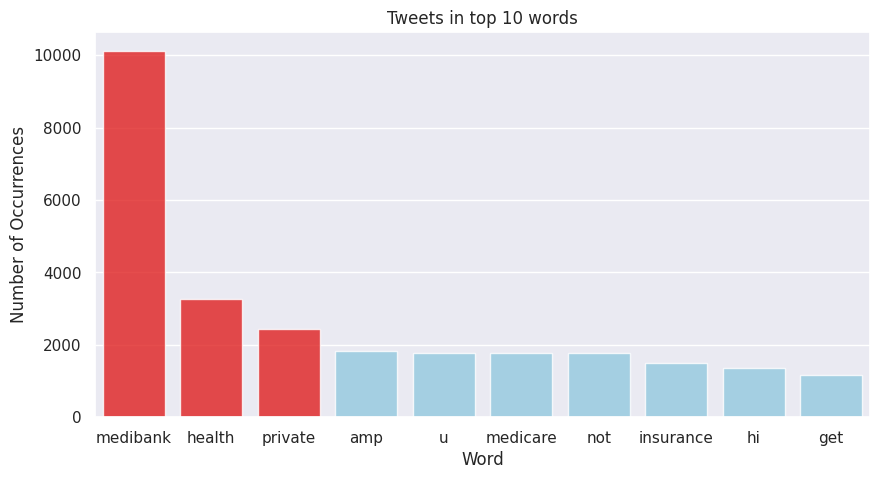

In [ ]:
# Visualize the top word counts

word_count_medibank  = word_frequency_medibank
word_count_medibank = word_count_medibank[:10,]
colors = ['red' if i < 3 else 'skyblue' for i in range(len(word_count_medibank))]
plt.figure(figsize=(10,5))
sns.barplot(x=word_count_medibank.index, y=word_count_medibank.values, alpha=0.8, palette=colors)
plt.title('Tweets in top 10 words')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Word', fontsize=12)
plt.show()

In [ ]:
# Filter rows where any column contains the letter ' medibank '
filtered_rows = df[(df['provider'] == 'medibank') & (df.apply(lambda row: row.astype(str).str.contains(' medicare ', case=False).any(), axis=1))]

# Display the first few rows of the filtered DataFrame
filtered_rows.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


date                                              tweet  \
12667  2022-04-10  316 fair greens labor problem dental medicare ...   
12668  2022-04-10  actually greg labor invented pbs 70 years ago ...   
12669  2022-04-10  85 dont education medibank medicare nbn slow e...   
12674  2022-04-09  labor always party focused health insiders bou...   
12675  2022-04-09  whitlam introduced medibank early 70s young nu...   

       provider                                        content_lem  
12667  medibank  316 fair green labor problem dental medicare a...  
12668  medibank  actually greg labor invented pb 70 year ago pm...  
12669  medibank  85 dont education medibank medicare nbn slow e...  
12674  medibank  labor always party focused health insider boug...  
12675  medibank  whitlam introduced medibank early 70 young nur...

In [ ]:
# Filter rows where any column contains the letter ' u '
filtered_rows = df[(df['provider'] == 'medibank') & (df.apply(lambda row: row.astype(str).str.contains(' u ', case=False).any(), axis=1))]

# Display the first few rows of the filtered DataFrame
filtered_rows.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


date                                              tweet  \
12673  2022-04-10  free university tafe medibank opposed vietnam ...   
12674  2022-04-09  labor always party focused health insiders bou...   
12682  2022-04-08  lnp hated medicareforall like vampires hate ga...   
12683  2022-04-08  lnp hated medicareforall like vampires hate ga...   
12704  2022-04-06  hi thanks getting touch us members eligible me...   

       provider                                        content_lem  
12673  medibank  free university tafe medibank opposed vietnam ...  
12674  medibank  labor always party focused health insider boug...  
12682  medibank  lnp hated medicareforall like vampire hate gar...  
12683  medibank  lnp hated medicareforall like vampire hate gar...  
12704  medibank  hi thanks getting touch u member eligible medi...

In [ ]:
# Filter rows where any column contains the letter ' hi '
filtered_rows = df[(df['provider'] == 'medibank') & (df.apply(lambda row: row.astype(str).str.contains(' hi ', case=False).any(), axis=1))]

# Display the first few rows of the filtered DataFrame
filtered_rows.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


date                                              tweet  \
13087  2022-02-23  raja hi passed feedback team looked soon possi...   
13386  2022-01-19  jaffe hi nick sorry isnt something hand read g...   
13437  2022-01-12  artworknft hi ruby continued support wellbeing...   
13443  2022-01-12  sheldrick hi im sorry long call waits try help...   
13907  2021-11-10  r hi ive seen dm ill continue chat private mes...   

       provider                                        content_lem  
13087  medibank  raja hi passed feedback team looked soon possi...  
13386  medibank  jaffe hi nick sorry isnt something hand read g...  
13437  medibank  artworknft hi ruby continued support wellbeing...  
13443  medibank  sheldrick hi im sorry long call wait try help ...  
13907  medibank  r hi ive seen dm ill continue chat private mes...

In [ ]:
# Creating a list of custom stopwords
new_words_to_remove_medibank = ["medibank", "u", 'medicare', 'hi','send','dm', 'health','private','insurance']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Word frequency for Medicare

In [ ]:
word_frequency_medicare = (
    pd.Series(' '.join(df[df['provider'] == 'medicare']['content_lem']).split())
    .value_counts()
)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Top 10 most frequently used words
word_frequency_medicare[:10]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


medicare    30524
rebate       9577
not          5103
amp          4101
health       3721
get          3603
social       3210
care         3123
tax          3108
security     2994
Name: count, dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-376-ca016fbe2d2a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=word_count_medicare.index, y=word_count_medicare.values, alpha=0.8, palette=colors)


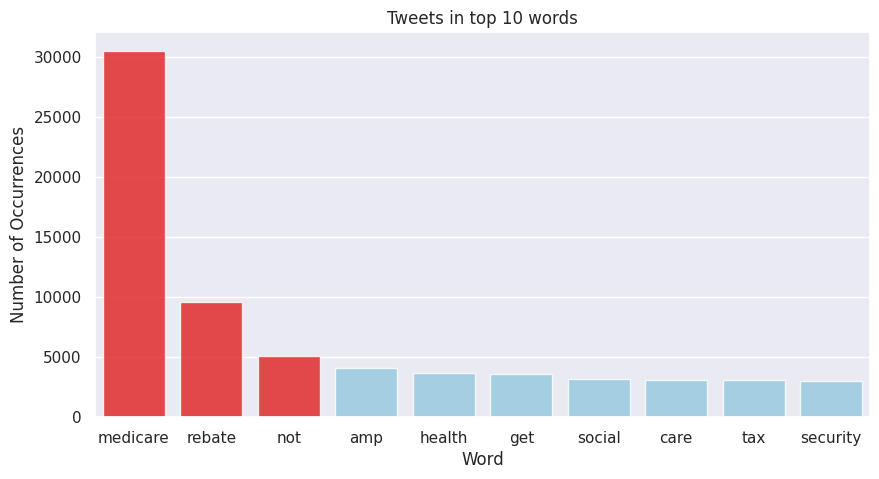

In [ ]:
# Visualize the top word counts

word_count_medicare  = word_frequency_medicare
word_count_medicare = word_count_medicare[:10,]
colors = ['red' if i < 3 else 'skyblue' for i in range(len(word_count_medicare))]
plt.figure(figsize=(10,5))
sns.barplot(x=word_count_medicare.index, y=word_count_medicare.values, alpha=0.8, palette=colors)
plt.title('Tweets in top 10 words')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Word', fontsize=12)
plt.show()

In [ ]:
# Filter rows where any column contains the letter ' medibank '
filtered_rows = df[(df['provider'] == 'medicare') & (df.apply(lambda row: row.astype(str).str.contains(' social ', case=False).any(), axis=1))]

# Display the first few rows of the filtered DataFrame
filtered_rows.head(20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


date                                              tweet  \
33773  2022-01-04  8 years lnp government weve policy anything ln...   
33845  2021-08-22  huh australia medicare australia private healt...   
33865  2021-07-12  think time would stop trolling instantly could...   
33933  2021-04-04  physicians natural attorneys poor social probl...   
33997  2020-09-20  sa ok whilehow company tax rates going superan...   
34014  2020-07-05  regards mental health issues please raise issu...   
34177  2019-05-16  bob hawkes government created medicare austral...   
34254  2018-09-15  oh medicare australia social medicine new give...   
34604  2022-03-27  critics argue combination low wages growth pre...   
34661  2022-03-23  alp menta health social worker worker scheme m...   
34731  2022-03-18  rick scott remember said especially discussing...   
34735  2022-03-18  hell first got social security medicare proper...   
34795  2022-03-12  joseph stiglitz amp former fed governor lawren...   
34885  2022-03-01  would many medicare bulkbilled psychological s...   
35204  2022-01-17  baker smith since jan 1 medicare benefits reba...   
35256  2022-01-13  small mask credit everyones tax return onetime...   
35296  2022-01-09  specialist care dental medicare abolish privat...   
35318  2022-01-09  onruka superannuation tax concessions mainly h...   
35595  2021-12-31  bridgetoofar testing problems qld gov medicare...   
35953  2021-11-08  retirees need federal deduction similar salt t...   

       provider                                        content_lem  
33773  medicare  8 year lnp government weve policy anything lnp...  
33845  medicare  huh australia medicare australia private healt...  
33865  medicare  think time would stop trolling instantly could...  
33933  medicare  physician natural attorney poor social problem...  
33997  medicare  sa ok whilehow company tax rate going superann...  
34014  medicare  regard mental health issue please raise issue ...  
34177  medicare  bob hawkes government created medicare austral...  
34254  medicare  oh medicare australia social medicine new give...  
34604  medicare  critic argue combination low wage growth premi...  
34661  medicare  alp menta health social worker worker scheme m...  
34731  medicare  rick scott remember said especially discussing...  
34735  medicare  hell first got social security medicare proper...  
34795  medicare  joseph stiglitz amp former fed governor lawren...  
34885  medicare  would many medicare bulkbilled psychological s...  
35204  medicare  baker smith since jan 1 medicare benefit rebat...  
35256  medicare  small mask credit everyones tax return onetime...  
35296  medicare  specialist care dental medicare abolish privat...  
35318  medicare  onruka superannuation tax concession mainly he...  
35595  medicare  bridgetoofar testing problem qld gov medicare ...  
35953  medicare  retiree need federal deduction similar salt ta...

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Filter rows where any column contains the letter ' medibank '
filtered_rows = df[(df['provider'] == 'medicare') & (df.apply(lambda row: row.astype(str).str.contains(' get ', case=False).any(), axis=1))]

# Display the first few rows of the filtered DataFrame
filtered_rows.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


date                                              tweet  \
33741  2022-03-30  answers auspol qt say genetic screening funded...   
33765  2022-01-15   never get much bother dealing medicare australia   
33771  2022-01-05  cant use freeforpensioners rats youre symptoma...   
33786  2021-12-20  currently uk shareholders get littleno return ...   
33815  2021-10-19  since 20 minutes long appointment medicare aus...   

       provider                                        content_lem  
33741  medicare  answer auspol qt say genetic screening funded ...  
33765  medicare   never get much bother dealing medicare australia  
33771  medicare  cant use freeforpensioners rat youre symptomat...  
33786  medicare  currently uk shareholder get littleno return n...  
33815  medicare  since 20 minute long appointment medicare aust...

In [ ]:
# Filter rows where any column contains the letter ' medibank '
filtered_rows = df[(df['provider'] == 'medicare') & (df.apply(lambda row: row.astype(str).str.contains(' security ', case=False).any(), axis=1))]

# Display the first few rows of the filtered DataFrame
filtered_rows.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


date                                              tweet  \
33865  2021-07-12  think time would stop trolling instantly could...   
34185  2019-05-03  e manuel medicare australia mayday staff gov a...   
34333  2017-07-10  government announces medicare security review ...   
34731  2022-03-18  rick scott remember said especially discussing...   
34735  2022-03-18  hell first got social security medicare proper...   

       provider                                        content_lem  
33865  medicare  think time would stop trolling instantly could...  
34185  medicare  e manuel medicare australia mayday staff gov a...  
34333  medicare  government announces medicare security review ...  
34731  medicare  rick scott remember said especially discussing...  
34735  medicare  hell first got social security medicare proper...

In [ ]:
# Creating a list of custom stopwords
new_words_to_remove_medicare = ['get', 'tax', 'medicare','health']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Word frequency for Bupa

In [ ]:
word_frequency_bupa = (
    pd.Series(' '.join(df[df['provider'] == 'bupa']['content_lem']).split())
    .value_counts()
)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Top 10 most frequently used words
word_frequency_bupa[:10]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


bupa             3210
australia        2471
health           1675
care             1530
not              1256
amp               950
agedcare          854
bupaaustralia     839
new               791
aged              776
Name: count, dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-382-e2bb294d57f0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=word_count_bupa.index, y=word_count_bupa.values, alpha=0.8, palette=colors)


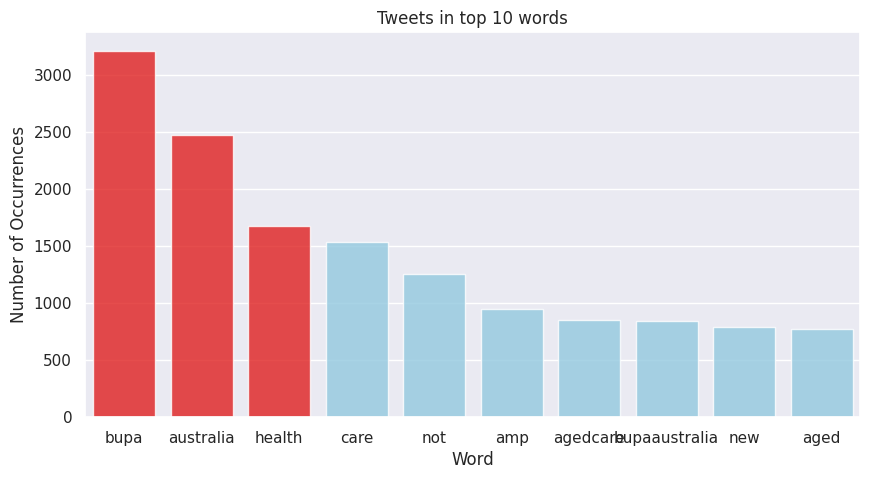

In [ ]:
# Visualize the top word counts

word_count_bupa  = word_frequency_bupa
word_count_bupa = word_count_bupa[:10,]
colors = ['red' if i < 3 else 'skyblue' for i in range(len(word_count_bupa))]
plt.figure(figsize=(10,5))
sns.barplot(x=word_count_bupa.index, y=word_count_bupa.values, alpha=0.8, palette=colors)
plt.title('Tweets in top 10 words')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Word', fontsize=12)
plt.show()

In [ ]:
# Creating a list of custom stopwords
new_words_to_remove_bupa = ['bupa', 'australia', 'bupaaustralia','health']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Word frequency for HBF

In [ ]:
word_frequency_hbf = (
    pd.Series(' '.join(df[df['provider'] == 'hbf']['content_lem']).split())
    .value_counts()
)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Top 10 most frequently used words
word_frequency_hbf[:10]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


health       281
hbf          241
not          241
get          187
amp          166
thanks       162
insurance    151
year         149
member       120
great        118
Name: count, dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-386-1bedbff18c9c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=word_count_hbf.index, y=word_count_hbf.values, alpha=0.8, palette=colors)


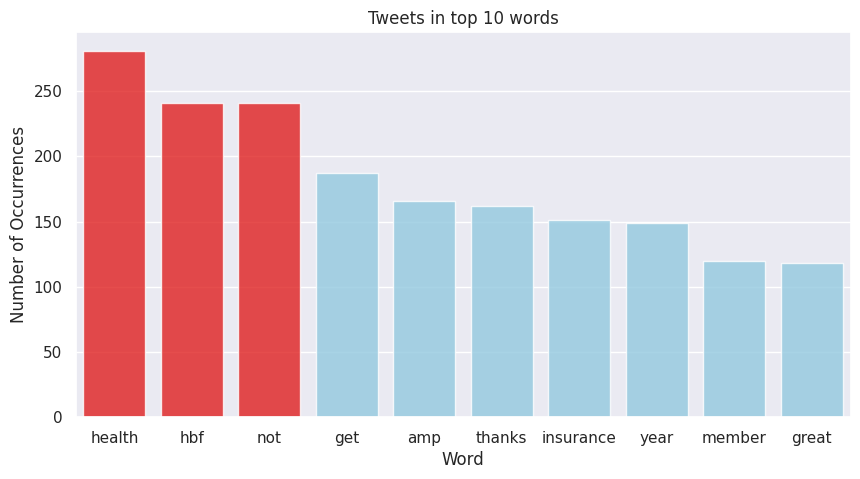

In [ ]:
# Visualize the top word counts

word_count_hbf  = word_frequency_hbf
word_count_hbf = word_count_hbf[:10,]
colors = ['red' if i < 3 else 'skyblue' for i in range(len(word_count_hbf))]
plt.figure(figsize=(10,5))
sns.barplot(x=word_count_hbf.index, y=word_count_hbf.values, alpha=0.8, palette=colors)
plt.title('Tweets in top 10 words')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Word', fontsize=12)
plt.show()

In [ ]:
# Filter rows where any column contains the letter ' u '
filtered_rows = df[(df['provider'] == 'hbf') & (df.apply(lambda row: row.astype(str).str.contains(' member ', case=False).any(), axis=1))]

# Display the first few rows of the filtered DataFrame
filtered_rows

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


date                                              tweet provider  \
75770  2022-04-13  ive guys quite hbf lady wow yes since 1997 act...      hbf   
75791  2022-03-18  name andrew domahidy work business administrat...      hbf   
75806  2022-03-11  offering members impacted floods south east qu...      hbf   
75809  2022-03-10  hbf joined members health help advance interes...      hbf   
75810  2022-03-09  health fund terrywhite chemmart announced new ...      hbf   
...           ...                                                ...      ...   
78478  2015-12-08  managing director tells members not use privat...      hbf   
78485  2015-11-03  thanks makinghealthyhappen free outdoor fitnes...      hbf   
78498  2015-10-21  first u blocked member 10 yrs also v disappoin...      hbf   
78519  2015-09-23  joining fee september members pay 1195 month c...      hbf   
78520  2015-09-23  joining fee september youre member youll pay 1...      hbf   

                                             content_lem  
75770  ive guy quite hbf lady wow yes since 1997 actu...  
75791  name andrew domahidy work business administrat...  
75806  offering member impacted flood south east quee...  
75809  hbf joined member health help advance interest...  
75810  health fund terrywhite chemmart announced new ...  
...                                                  ...  
78478  managing director tell member not use private ...  
78485  thanks makinghealthyhappen free outdoor fitnes...  
78498  first u blocked member 10 yr also v disappoint...  
78519  joining fee september member pay 1195 month co...  
78520  joining fee september youre member youll pay 1...  

[94 rows x 4 columns]

In [ ]:
# Creating a list of custom stopwords
new_words_to_remove_hbf = ['hbf', 'year', 'member', 'health','insurance']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Overall Word frequency analysis

In [ ]:
# Create a word frequency series. (This is a pandas series)
word_frequency = pd.Series(' '.join(df['content_lem']).split()).value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
word_frequency[:10]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


medicare     32421
medibank     10188
rebate        9830
health        8934
not           8371
amp           7041
get           5648
care          5276
insurance     4735
private       4632
Name: count, dtype: int64

In [ ]:
# least common words
word_frequency[-10:]  # get top 10

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


aanpak            1
integrale         1
voorbeeld         1
mooi              1
cris              1
younus            1
prepper           1
iamunconquered    1
christos          1
gloucester        1
Name: count, dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-392-fe525b7e474d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=word_count.index, y=word_count.values, alpha=0.8, palette=colors)


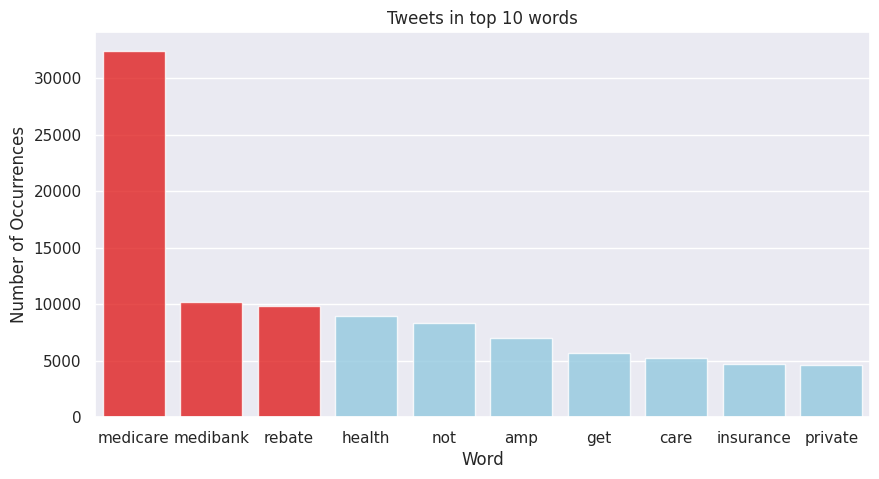

In [ ]:
# Visualize the top word counts

word_count  = word_frequency
word_count = word_count[:10,]
colors = ['red' if i < 3 else 'skyblue' for i in range(len(word_count))]
plt.figure(figsize=(10,5))
sns.barplot(x=word_count.index, y=word_count.values, alpha=0.8, palette=colors)
plt.title('Tweets in top 10 words')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Word', fontsize=12)
plt.show()

In [ ]:
from PIL import Image
from wordcloud import WordCloud

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


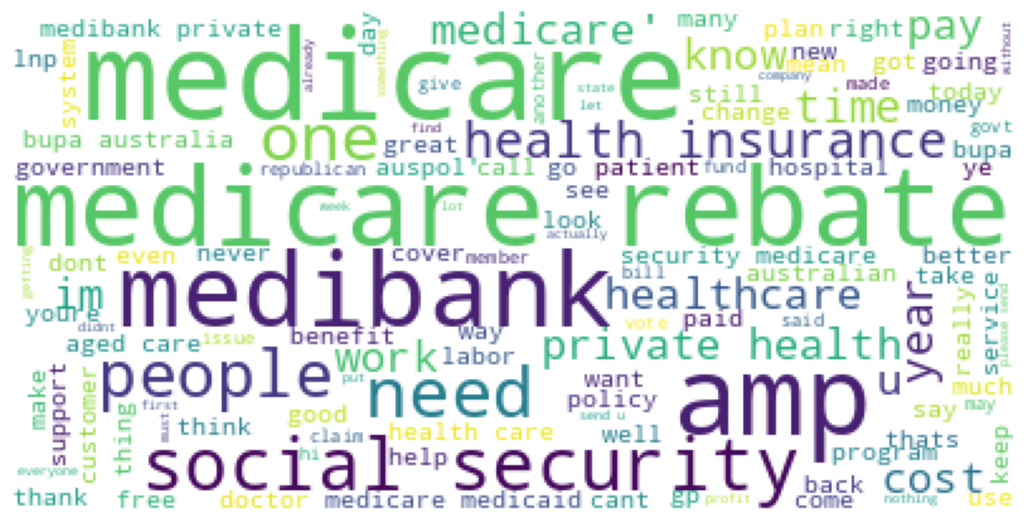

In [ ]:
corpus = list(df['content_lem'])

wordcloud = WordCloud(background_color='white', max_words=200, max_font_size=50, random_state=42).generate(str(corpus))

fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#Remove common words

## Removing Medibank common words

In [ ]:
filtered_df_medibank = df[df['provider'] == 'medibank']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Remove common words
# We will use lambda function here.
filtered_df_medibank['content_lem'] = filtered_df_medibank['content_lem'].apply(lambda x: " ".join(x for x in x.split() if x not in new_words_to_remove_medibank))
filtered_df_medibank.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-396-44a797132ca4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_medibank['content_lem'] = filtered_df_medibank['content_lem'].apply(lambda x: " ".join(x for x in x.split() if x not in new_words_to_remove_medibank))


date                                              tweet  \
12665  2022-04-11  fraser government destroyed original medibank ...   
12666  2022-04-10  actually whitlam made medibank fraser done wor...   
12667  2022-04-10  316 fair greens labor problem dental medicare ...   
12668  2022-04-10  actually greg labor invented pbs 70 years ago ...   
12669  2022-04-10  85 dont education medibank medicare nbn slow e...   

       provider                                        content_lem  
12665  medibank  fraser government destroyed original liberal p...  
12666  medibank  actually whitlam made fraser done worst resurr...  
12667  medibank  316 fair green labor problem dental always ref...  
12668  medibank  actually greg labor invented pb 70 year ago pm...  
12669  medibank  85 dont education nbn slow expensive obsolete ...

## Removing Medicare common words

In [ ]:
filtered_df_medicare = df[df['provider'] == 'medicare']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Remove common words
# We will use lambda function here.
filtered_df_medicare['content_lem'] = filtered_df_medicare['content_lem'].apply(lambda x: " ".join(x for x in x.split() if x not in new_words_to_remove_medicare))
filtered_df_medicare.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-398-427c65307ac0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_medicare['content_lem'] = filtered_df_medicare['content_lem'].apply(lambda x: " ".join(x for x in x.split() if x not in new_words_to_remove_medicare))


date                                              tweet  \
33732  2022-04-10  era un boludou espaa tiene salud pblica inglat...   
33733  2022-04-10  telehealth ads still radio auspol election cal...   
33734  2022-04-09  bureaucracy nswhealth improve nsw rural health...   
33735  2022-04-08  dont like sound american health system protect...   
33736  2022-04-08  family member come issue today must changed au...   

       provider                                        content_lem  
33732  medicare  era un boludou espaa tiene salud pblica inglat...  
33733  medicare  telehealth ad still radio auspol election call...  
33734  medicare  bureaucracy nswhealth improve nsw rural rumour...  
33735  medicare  dont like sound american system protect austra...  
33736  medicare  family member come issue today must changed au...

## Removing Bupa common words

In [ ]:
filtered_df_bupa = df[df['provider'] == 'bupa']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Remove common words
# We will use lambda function here.
filtered_df_bupa['content_lem'] = filtered_df_bupa['content_lem'].apply(lambda x: " ".join(x for x in x.split() if x not in new_words_to_remove_bupa))
filtered_df_bupa.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-400-320f342fb675>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_bupa['content_lem'] = filtered_df_bupa['content_lem'].apply(lambda x: " ".join(x for x in x.split() if x not in new_words_to_remove_bupa))


date                                              tweet provider  \
0  2022-04-10  waited 30 minutes get cover review specialist ...     bupa   
1  2022-04-09  business administrator australia sponsorship o...     bupa   
2  2022-04-09  want satisfy familys sweet cravings without gu...     bupa   
3  2022-04-08  carer bupa australia victoria coburg carejobs ...     bupa   
5  2022-04-08  carer bupa australia victoria ballarat carejob...     bupa   

                                         content_lem  
0  waited 30 minute get cover review specialist j...  
1  business administrator sponsorship opportunity...  
2  want satisfy family sweet craving without guil...  
3            carer victoria coburg carejobs agedcare  
5          carer victoria ballarat carejobs agedcare

## Removing HBF common words

In [ ]:
filtered_df_hbf = df[df['provider'] == 'hbf']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Remove common words
# We will use lambda function here.
filtered_df_hbf['content_lem'] = filtered_df_hbf['content_lem'].apply(lambda x: " ".join(x for x in x.split() if x not in new_words_to_remove_hbf))
filtered_df_hbf.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-402-8b7caba5d420>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_hbf['content_lem'] = filtered_df_hbf['content_lem'].apply(lambda x: " ".join(x for x in x.split() if x not in new_words_to_remove_hbf))


date                                              tweet provider  \
75749  2022-04-23  thank great customer service bought new policy...      hbf   
75752  2022-04-21  cute ad adorable clever lyrics lyrics hbfhealt...      hbf   
75753  2022-04-20  im pensioner health cover cost increased 12 ch...      hbf   
75754  2022-04-19  seems get one limit covers services use need n...      hbf   
75755  2022-04-19                           iwish stretch dollar far      hbf   

                                             content_lem  
75749  thank great customer service bought new policy...  
75752  cute ad adorable clever lyric lyric hbfhealth ...  
75753  im pensioner cover cost increased 12 change co...  
75754  seems get one limit cover service use need nee...  
75755                           iwish stretch dollar far

In [ ]:
# combine the 4 datasets
new_df = pd.concat([filtered_df_medibank, filtered_df_medicare, filtered_df_bupa, filtered_df_hbf])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
new_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


date                                              tweet  \
12665  2022-04-11  fraser government destroyed original medibank ...   
12666  2022-04-10  actually whitlam made medibank fraser done wor...   
12667  2022-04-10  316 fair greens labor problem dental medicare ...   
12668  2022-04-10  actually greg labor invented pbs 70 years ago ...   
12669  2022-04-10  85 dont education medibank medicare nbn slow e...   
...           ...                                                ...   
78582  2014-03-31  injury update visit hbfhealth centre full news...   
78583  2014-03-27  hbfhealth injury centre rt mark hutchings inju...   
78584  2014-03-26  get latest hbfhealth medical update favourite ...   
78585  2013-05-26  hbfted hbfhealth hbfrun runforareason ted self...   
78586  2013-05-26  nofilter hbfhealth hbfrun runforareason congra...   

       provider                                        content_lem  
12665  medibank  fraser government destroyed original liberal p...  
12666  medibank  actually whitlam made fraser done worst resurr...  
12667  medibank  316 fair green labor problem dental always ref...  
12668  medibank  actually greg labor invented pb 70 year ago pm...  
12669  medibank  85 dont education nbn slow expensive obsolete ...  
...         ...                                                ...  
78582       hbf  injury update visit hbfhealth centre full news...  
78583       hbf  hbfhealth injury centre rt mark hutchings inju...  
78584       hbf  get latest hbfhealth medical update favourite ...  
78585       hbf  hbfted hbfhealth hbfrun runforareason ted self...  
78586       hbf  nofilter hbfhealth hbfrun runforareason congra...  

[61852 rows x 4 columns]

##Overall

In [ ]:
# Create a word frequency series. (This is a pandas series)
word_frequency_new = pd.Series(' '.join(new_df['content_lem']).split()).value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# least common words
word_frequency_new[:10]  # get top 10

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


rebate    9830
not       8371
amp       7041
care      5276
people    3806
need      3633
pay       3617
would     3610
year      3546
like      3529
Name: count, dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-407-b7c5aba1e1e6>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=word_count_new.index, y=word_count_new.values, alpha=0.8, palette=colors)


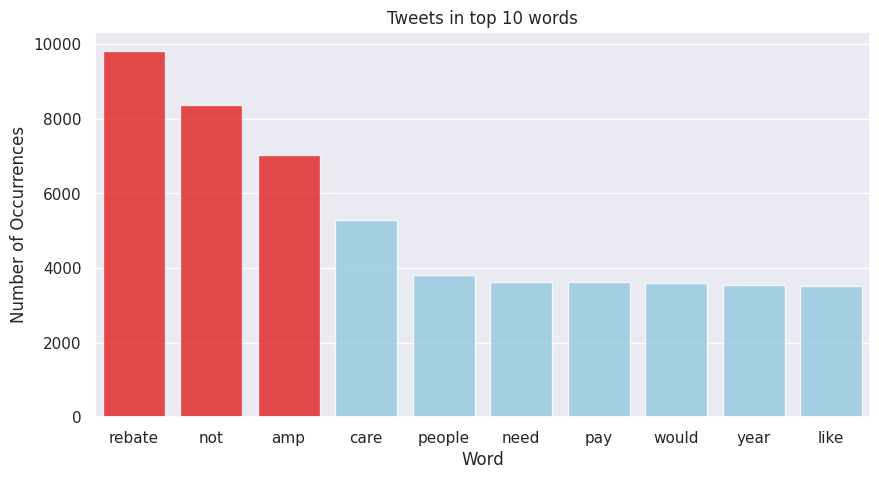

In [ ]:
# Visualize the top word counts

word_count_new  = word_frequency_new
word_count_new = word_count_new[:10,]
colors = ['red' if i < 3 else 'skyblue' for i in range(len(word_count_new))]
plt.figure(figsize=(10,5))
sns.barplot(x=word_count_new.index, y=word_count_new.values, alpha=0.8, palette=colors)
plt.title('Tweets in top 10 words')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Word', fontsize=12)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


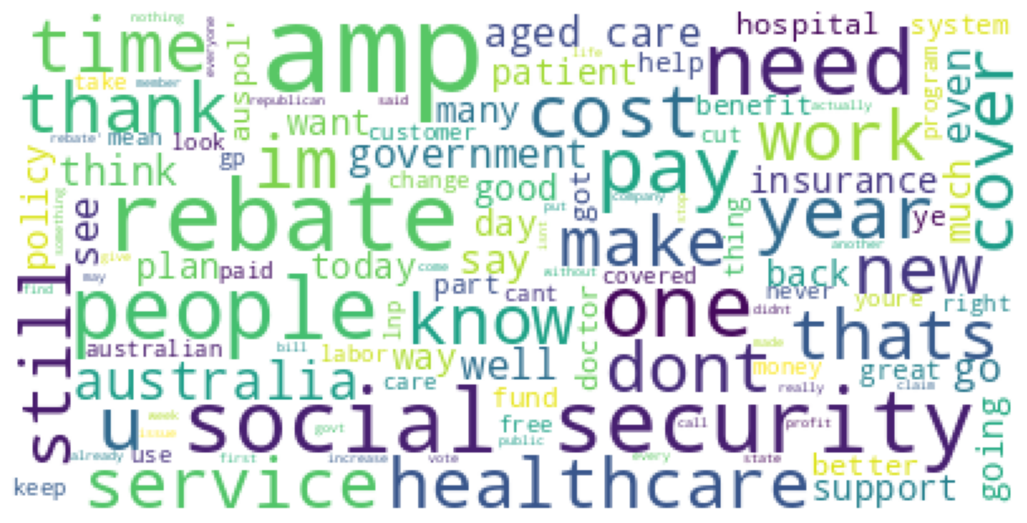

In [ ]:
corpus = list(new_df['content_lem'])

wordcloud = WordCloud(background_color='white', max_words=200, max_font_size=50, random_state=42).generate(str(corpus))

fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Bigrams and Trigrams

## Bigrams

In [ ]:
# This function will generate most frequently occuring Bi-grams
def get_ngrams(corpus, ngram_range=(2, 2)):

    # Create CountVectorizer object from sklearn library with bigrams
    vec1 = CountVectorizer(ngram_range=ngram_range, max_features=2000).fit(corpus)

    # Create BoW feature representation using word frequency
    bag_of_words = vec1.transform(corpus)

    # compute sum of words
    sum_words = bag_of_words.sum(axis=0)

    # create (word, frequency) tuples for bigrams
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
bigrams_filtered_df_medibank = get_ngrams(filtered_df_medibank['content_lem'].tolist(), ngram_range=(2, 2))
bigrams_filtered_df_medicare = get_ngrams(filtered_df_medicare['content_lem'].tolist(), ngram_range=(2, 2))
bigrams_filtered_df_bupa = get_ngrams(filtered_df_bupa['content_lem'].tolist(), ngram_range=(2, 2))
bigrams_filtered_df_hbf = get_ngrams(filtered_df_hbf['content_lem'].tolist(), ngram_range=(2, 2))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
bigrams_filtered_df_medibank[:10]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('sorry hear', 256),
 ('im sorry', 218),
 ('craig drummond', 189),
 ('melbourne marathon', 164),
 ('please detail', 158),
 ('premium increase', 132),
 ('kind regard', 128),
 ('universal care', 123),
 ('ceo craig', 122),
 ('gough whitlam', 111)]

In [ ]:
bigrams_filtered_df_medicare[:10]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('social security', 2887),
 ('rebate freeze', 612),
 ('rebate rule', 521),
 ('private insurance', 490),
 ('aged care', 481),
 ('rick scott', 426),
 ('alzheimers drug', 386),
 ('drug price', 279),
 ('insurance company', 275),
 ('take away', 267)]

In [ ]:
bigrams_filtered_df_bupa[:10]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('aged care', 745),
 ('carejobs agedcare', 551),
 ('agedcare disabilitysupport', 428),
 ('new south', 360),
 ('south wale', 360),
 ('care home', 202),
 ('registered nurse', 137),
 ('private insurance', 124),
 ('nursing home', 105),
 ('catering assistant', 104)]

In [ ]:
bigrams_filtered_df_hbf[:10]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('injury update', 65),
 ('john van', 24),
 ('van der', 24),
 ('der wielen', 22),
 ('hbfactivate hackathon', 22),
 ('customer service', 21),
 ('medical update', 19),
 ('good news', 17),
 ('well done', 15),
 ('im not', 14)]

In [ ]:
bigrams_filtered_df_medibank = pd.DataFrame(bigrams_filtered_df_medibank)
bigrams_filtered_df_medibank.columns=["Bi-gram", "Freq"]

bigrams_filtered_df_medicare = pd.DataFrame(bigrams_filtered_df_medicare)
bigrams_filtered_df_medicare.columns=["Bi-gram", "Freq"]

bigrams_filtered_df_bupa = pd.DataFrame(bigrams_filtered_df_bupa)
bigrams_filtered_df_bupa.columns=["Bi-gram", "Freq"]

bigrams_filtered_df_hbf = pd.DataFrame(bigrams_filtered_df_hbf)
bigrams_filtered_df_hbf.columns=["Bi-gram", "Freq"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-416-42d194e4a7a7>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  h.set_xticklabels(h.get_xticklabels(), rotation=90)  # here rotation parameter shows the angle of your x-axis labels


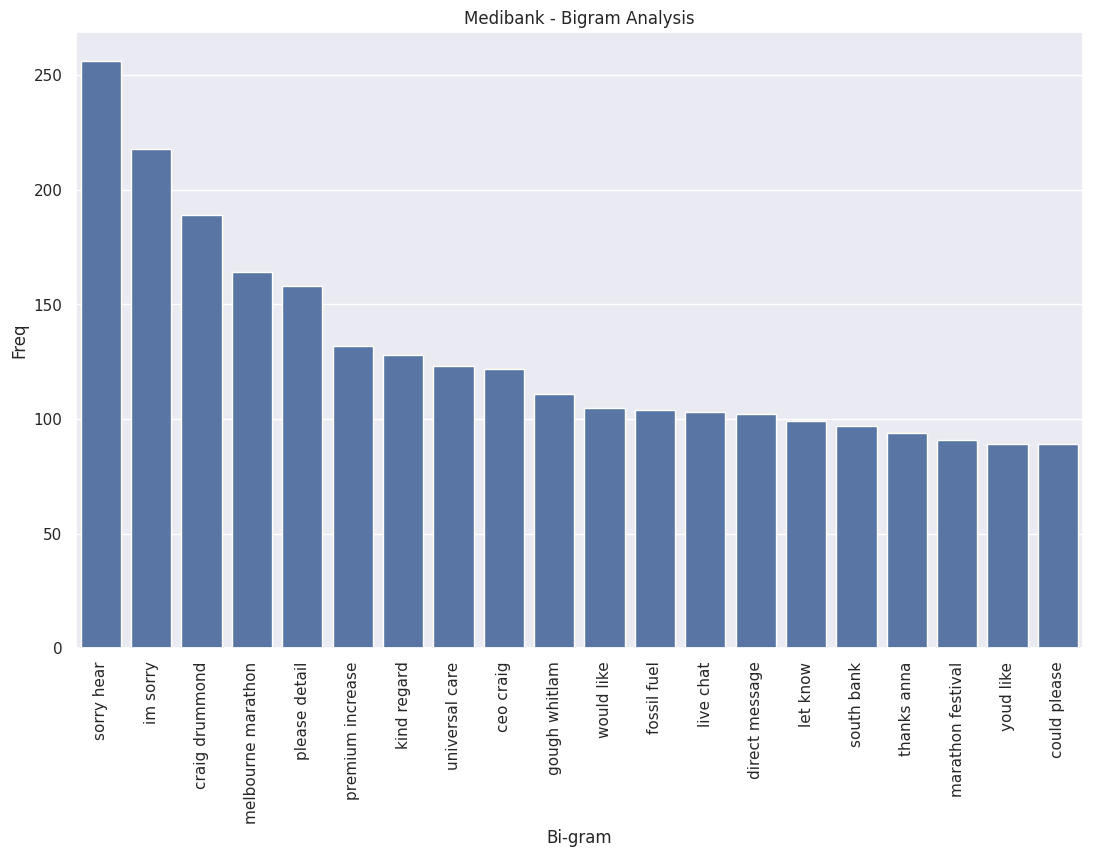

In [ ]:
# Barplot of most freq Bi-grams
top_bigrams_to_show = 20

sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=bigrams_filtered_df_medibank[:top_bigrams_to_show])
h.set_xticklabels(h.get_xticklabels(), rotation=90)  # here rotation parameter shows the angle of your x-axis labels
plt.title('Medibank - Bigram Analysis')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-417-6c1adeaa36ff>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  h.set_xticklabels(h.get_xticklabels(), rotation=90)  # here rotation parameter shows the angle of your x-axis labels


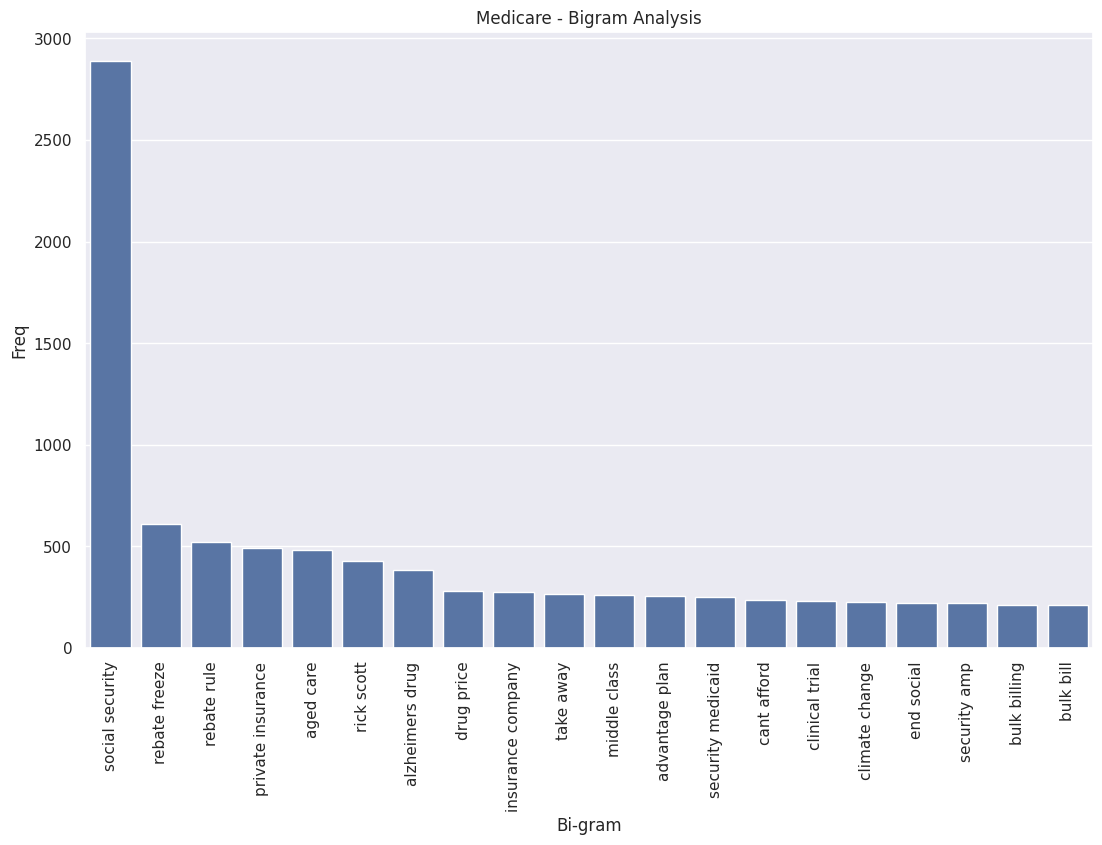

In [ ]:
# Barplot of most freq Bi-grams
top_bigrams_to_show = 20

sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=bigrams_filtered_df_medicare[:top_bigrams_to_show])
h.set_xticklabels(h.get_xticklabels(), rotation=90)  # here rotation parameter shows the angle of your x-axis labels
plt.title('Medicare - Bigram Analysis')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-418-1127b2f3e80f>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  h.set_xticklabels(h.get_xticklabels(), rotation=90)  # here rotation parameter shows the angle of your x-axis labels


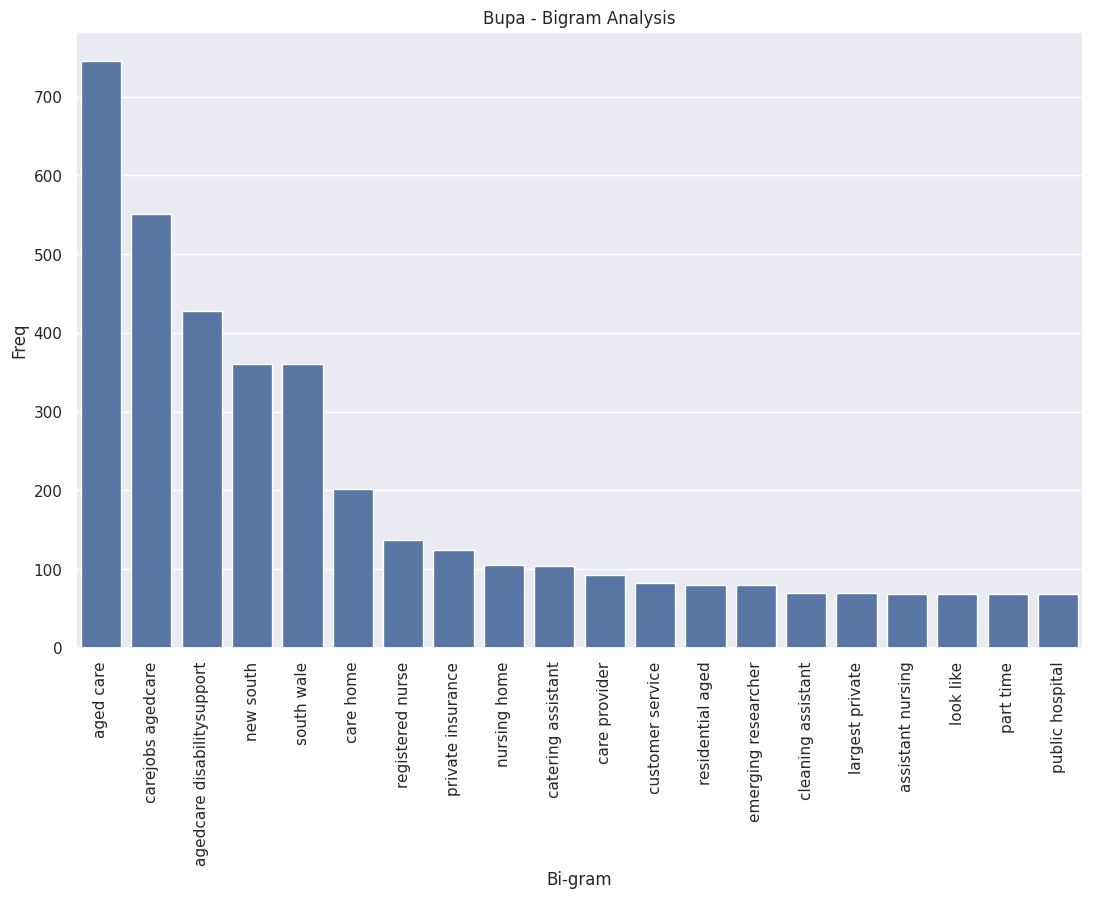

In [ ]:
# Barplot of most freq Bi-grams
top_bigrams_to_show = 20

sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=bigrams_filtered_df_bupa[:top_bigrams_to_show])
h.set_xticklabels(h.get_xticklabels(), rotation=90)  # here rotation parameter shows the angle of your x-axis labels
plt.title('Bupa - Bigram Analysis')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-419-6da4266bc9f1>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  h.set_xticklabels(h.get_xticklabels(), rotation=90)  # here rotation parameter shows the angle of your x-axis labels


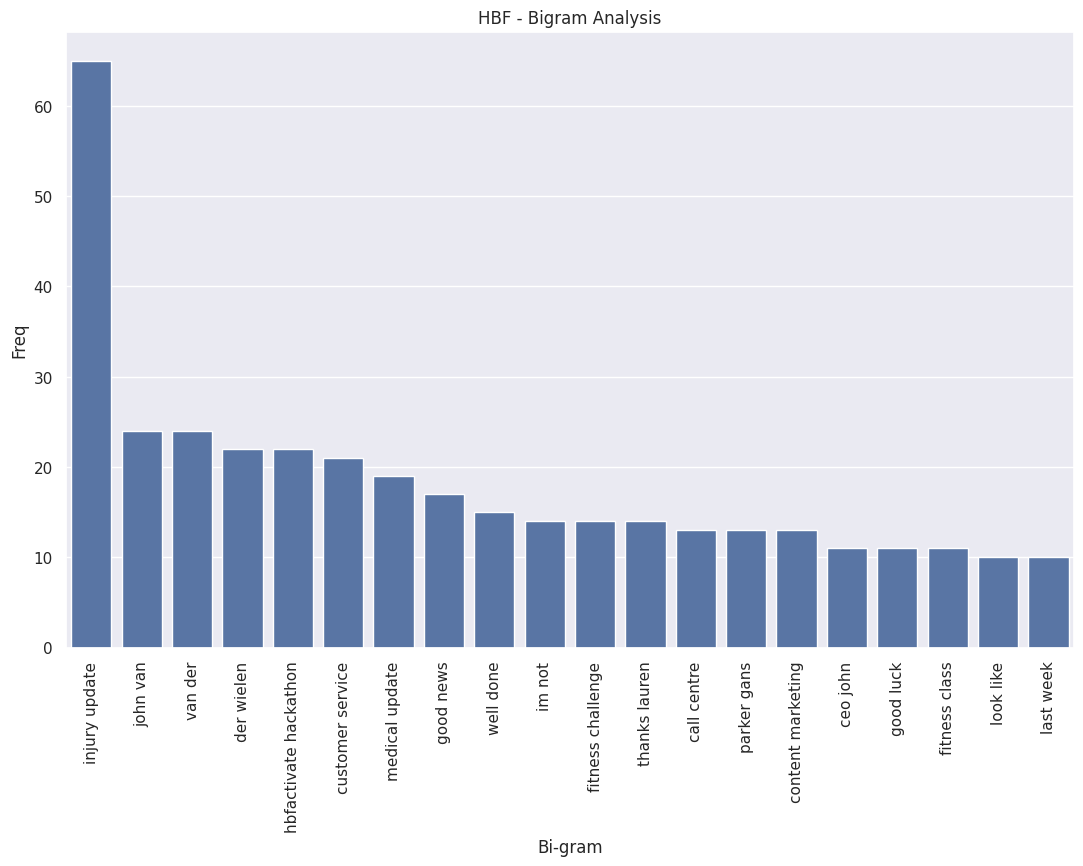

In [ ]:
# Barplot of most freq Bi-grams
top_bigrams_to_show = 20

sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=bigrams_filtered_df_hbf[:top_bigrams_to_show])
h.set_xticklabels(h.get_xticklabels(), rotation=90)  # here rotation parameter shows the angle of your x-axis labels
plt.title('HBF - Bigram Analysis')
plt.show()

### Overall

In [ ]:
# This function will generate most frequently occuring Bi-grams
def get_ngrams(corpus, ngram_range=(2, 2)):

    # Create CountVectorizer object from sklearn library with bigrams
    vec1 = CountVectorizer(ngram_range=ngram_range, max_features=2000).fit(corpus)

    # Create BoW feature representation using word frequency
    bag_of_words = vec1.transform(corpus)

    # compute sum of words
    sum_words = bag_of_words.sum(axis=0)

    # create (word, frequency) tuples for bigrams
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-476-0b226c409f0a>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  h.set_xticklabels(h.get_xticklabels(), rotation=90)  # here rotation parameter shows the angle of your x-axis labels


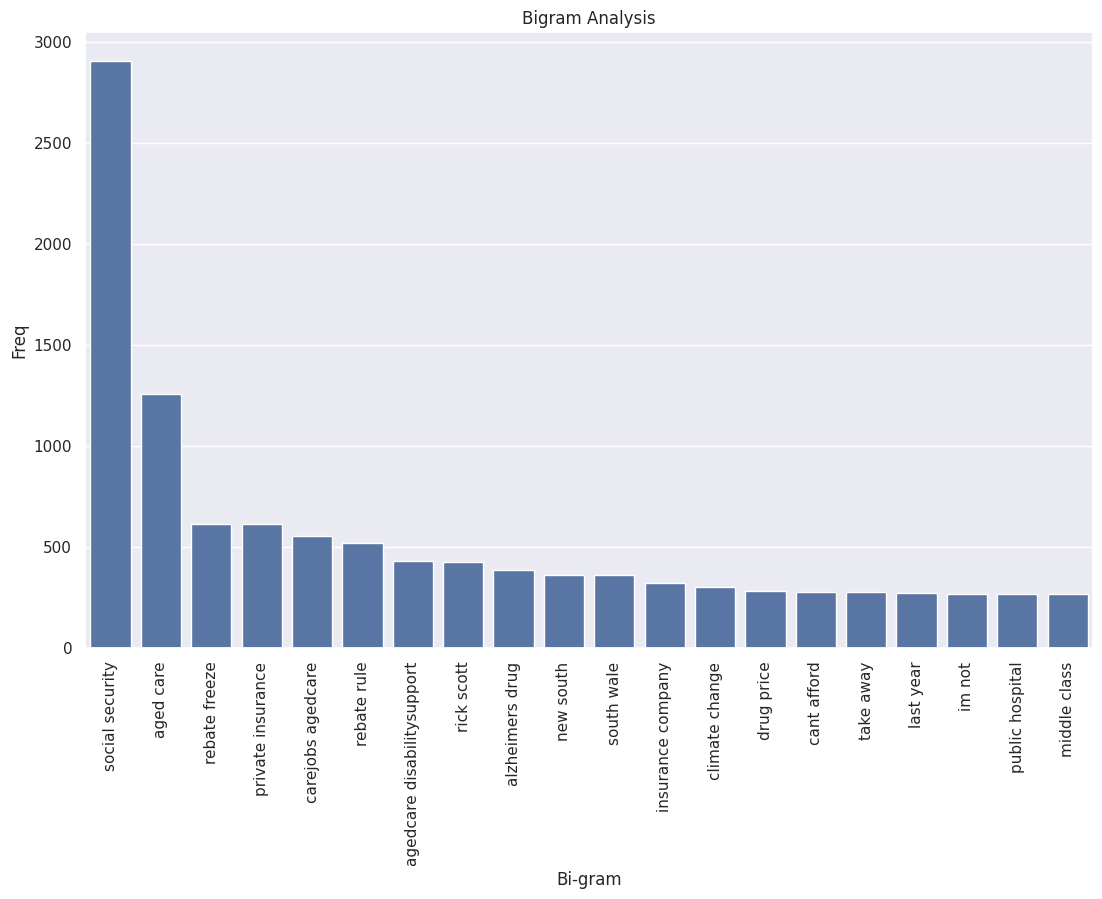

In [ ]:
df_bi = get_ngrams(new_df['content_lem'].tolist(), ngram_range=(2, 2))
df_bi = pd.DataFrame(df_bi)
df_bi.columns=["Bi-gram", "Freq"]

# Barplot of most freq Bi-grams
top_bigrams_to_show = 20

sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=df_bi[:top_bigrams_to_show])
h.set_xticklabels(h.get_xticklabels(), rotation=90)  # here rotation parameter shows the angle of your x-axis labels
plt.title('Bigram Analysis')
plt.show()



## Trigrams

In [ ]:
# This function will generate most frequently occuring Bi-grams
def get_ngrams(corpus, ngram_range=(3, 3)):

    # Create CountVectorizer object from sklearn library with bigrams
    vec1 = CountVectorizer(ngram_range=ngram_range, max_features=2000).fit(corpus)

    # Create BoW feature representation using word frequency
    bag_of_words = vec1.transform(corpus)

    # compute sum of words
    sum_words = bag_of_words.sum(axis=0)

    # create (word, frequency) tuples for bigrams
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
trigrams_filtered_df_medibank = get_ngrams(filtered_df_medibank['content_lem'].tolist(), ngram_range=(3, 3))
trigrams_filtered_df_medicare = get_ngrams(filtered_df_medicare['content_lem'].tolist(), ngram_range=(3, 3))
trigrams_filtered_df_bupa = get_ngrams(filtered_df_bupa['content_lem'].tolist(), ngram_range=(3, 3))
trigrams_filtered_df_hbf = get_ngrams(filtered_df_hbf['content_lem'].tolist(), ngram_range=(3, 3))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
trigrams_filtered_df_medibank[:10]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('ceo craig drummond', 120),
 ('melbourne marathon festival', 90),
 ('kind regard robin', 78),
 ('feel good program', 74),
 ('im sorry hear', 72),
 ('sorry hear experience', 70),
 ('south bank piazza', 63),
 ('thanks getting touch', 59),
 ('free forever thanks', 49),
 ('athletesfoot blackmores beawellbeing', 49)]

In [ ]:
trigrams_filtered_df_medicare[:10]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('social security medicaid', 241),
 ('end social security', 219),
 ('social security amp', 215),
 ('new alzheimers drug', 166),
 ('away social security', 153),
 ('stop 2018 insurance', 139),
 ('2018 insurance senior', 138),
 ('insurance senior counting', 138),
 ('senior counting rebate', 137),
 ('free help gt', 120)]

In [ ]:
trigrams_filtered_df_bupa[:10]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('carejobs agedcare disabilitysupport', 428),
 ('new south wale', 360),
 ('aged care home', 109),
 ('aged care provider', 91),
 ('residential aged care', 80),
 ('village aged care', 67),
 ('recreational activity officer', 62),
 ('private residential aged', 59),
 ('aged care largest', 59),
 ('care largest private', 58)]

In [ ]:
trigrams_filtered_df_hbf[:10]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('john van der', 24),
 ('van der wielen', 22),
 ('ceo john van', 9),
 ('full injury update', 9),
 ('workplace new dad', 8),
 ('hbfactivate info night', 8),
 ('detail injury update', 6),
 ('injury update foreverfreo', 6),
 ('week injury update', 6),
 ('3500 spend trip', 5)]

In [ ]:
trigrams_filtered_df_medibank = pd.DataFrame(trigrams_filtered_df_medibank)
trigrams_filtered_df_medibank.columns=["Tri-gram", "Freq"]

trigrams_filtered_df_medicare = pd.DataFrame(trigrams_filtered_df_medicare)
trigrams_filtered_df_medicare.columns=["Tri-gram", "Freq"]

trigrams_filtered_df_bupa = pd.DataFrame(trigrams_filtered_df_bupa)
trigrams_filtered_df_bupa.columns=["Tri-gram", "Freq"]

trigrams_filtered_df_hbf = pd.DataFrame(trigrams_filtered_df_hbf)
trigrams_filtered_df_hbf.columns=["Tri-gram", "Freq"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-427-e51265b0f618>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  h.set_xticklabels(h.get_xticklabels(), rotation=90)  # here rotation parameter shows the angle of your x-axis labels


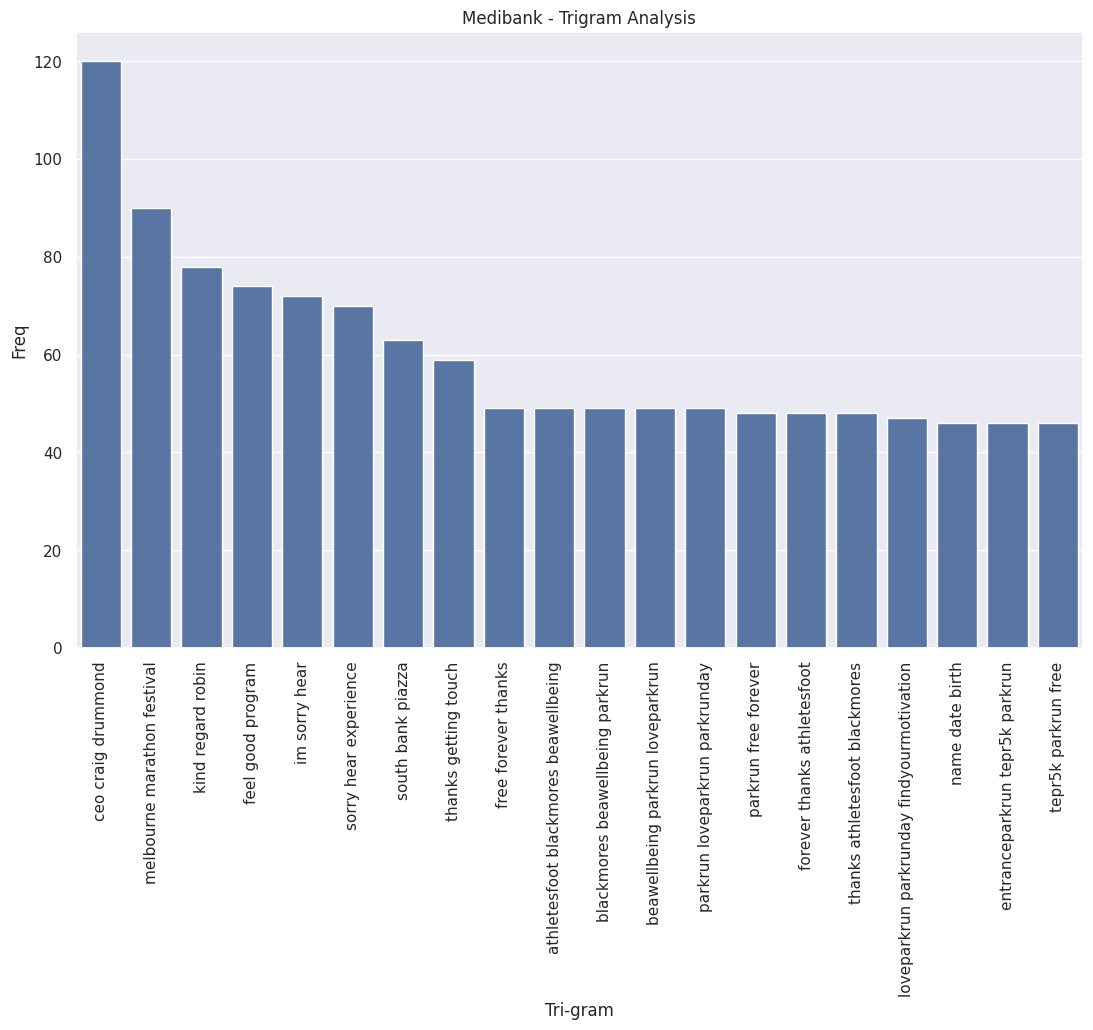

In [ ]:
# Barplot of most freq Bi-grams
top_bigrams_to_show = 20

sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Tri-gram", y="Freq", data=trigrams_filtered_df_medibank[:top_bigrams_to_show])
h.set_xticklabels(h.get_xticklabels(), rotation=90)  # here rotation parameter shows the angle of your x-axis labels
plt.title('Medibank - Trigram Analysis')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-428-3919bb77e5b2>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  h.set_xticklabels(h.get_xticklabels(), rotation=90)  # here rotation parameter shows the angle of your x-axis labels


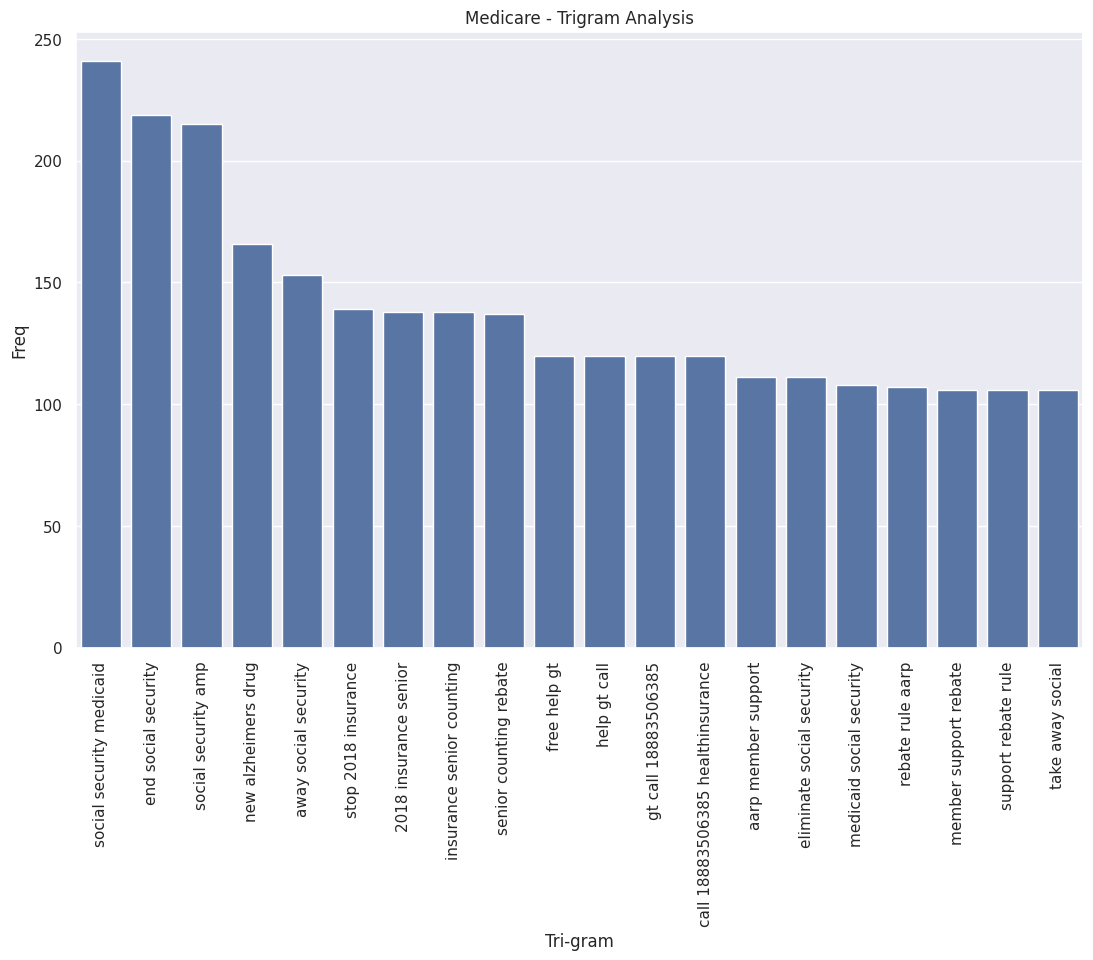

In [ ]:
# Barplot of most freq Bi-grams
top_bigrams_to_show = 20

sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Tri-gram", y="Freq", data=trigrams_filtered_df_medicare[:top_bigrams_to_show])
h.set_xticklabels(h.get_xticklabels(), rotation=90)  # here rotation parameter shows the angle of your x-axis labels
plt.title('Medicare - Trigram Analysis')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-429-61ce5b858e78>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  h.set_xticklabels(h.get_xticklabels(), rotation=90)  # here rotation parameter shows the angle of your x-axis labels


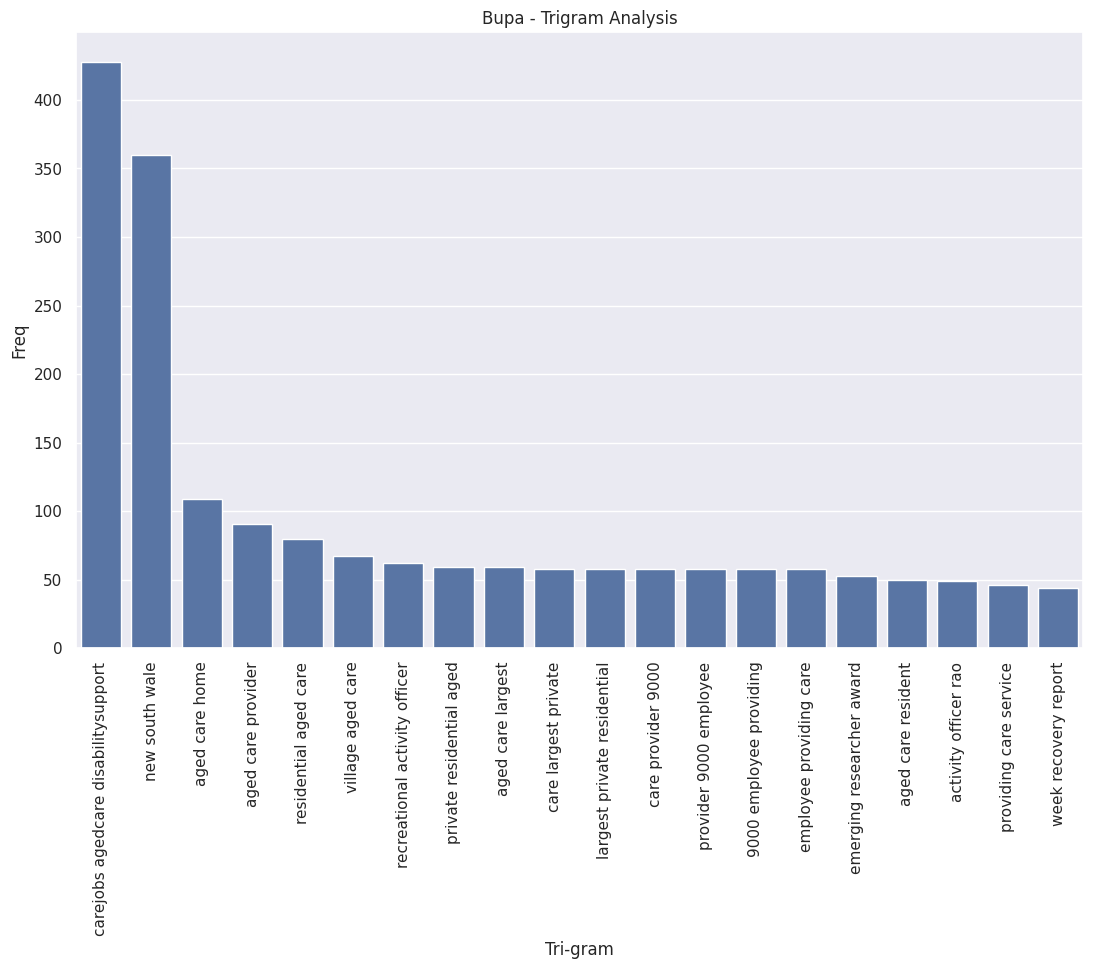

In [ ]:
# Barplot of most freq Bi-grams
top_bigrams_to_show = 20

sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Tri-gram", y="Freq", data=trigrams_filtered_df_bupa[:top_bigrams_to_show])
h.set_xticklabels(h.get_xticklabels(), rotation=90)  # here rotation parameter shows the angle of your x-axis labels
plt.title('Bupa - Trigram Analysis')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-430-f41ee288094f>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  h.set_xticklabels(h.get_xticklabels(), rotation=90)  # here rotation parameter shows the angle of your x-axis labels


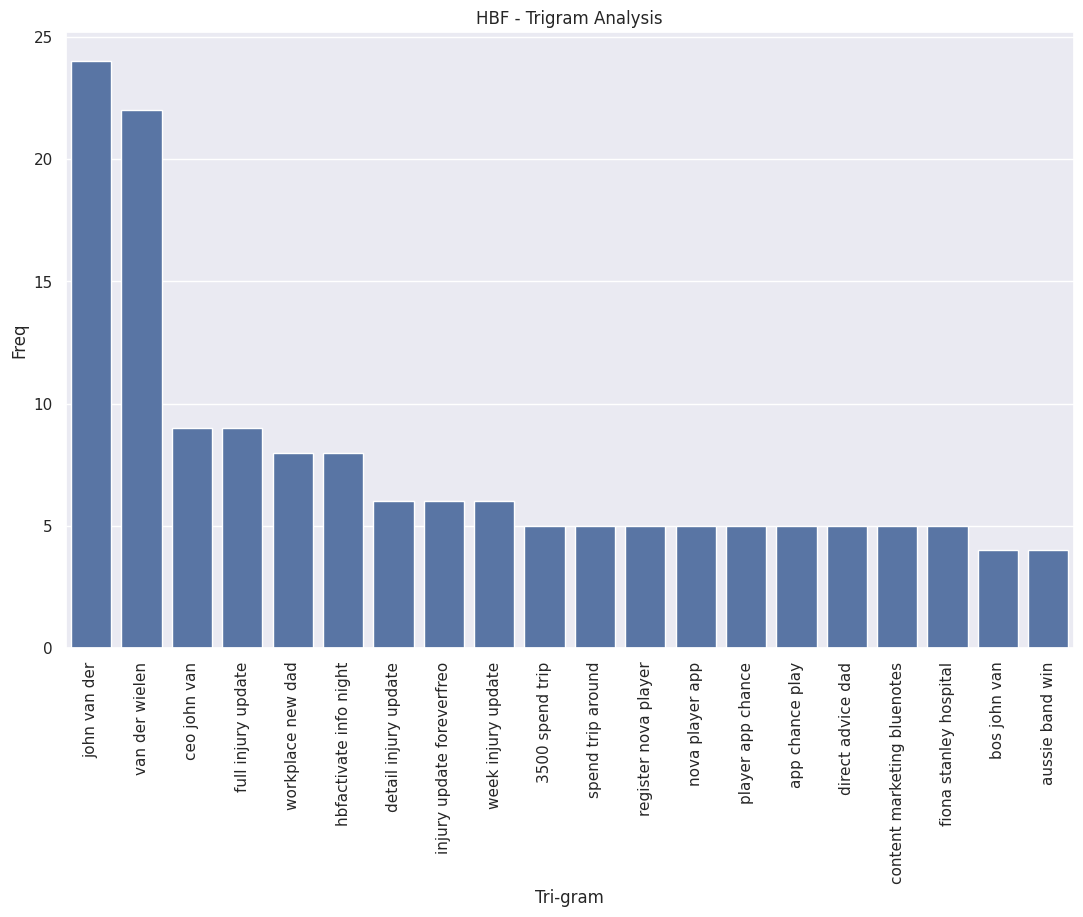

In [ ]:
# Barplot of most freq Bi-grams
top_bigrams_to_show = 20

sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Tri-gram", y="Freq", data=trigrams_filtered_df_hbf[:top_bigrams_to_show])
h.set_xticklabels(h.get_xticklabels(), rotation=90)  # here rotation parameter shows the angle of your x-axis labels
plt.title('HBF - Trigram Analysis')
plt.show()

### Overall

In [ ]:
# This function will generate most frequently occuring Bi-grams
def get_ngrams(corpus, ngram_range=(3, 3)):

    # Create CountVectorizer object from sklearn library with bigrams
    vec1 = CountVectorizer(ngram_range=ngram_range, max_features=2000).fit(corpus)

    # Create BoW feature representation using word frequency
    bag_of_words = vec1.transform(corpus)

    # compute sum of words
    sum_words = bag_of_words.sum(axis=0)

    # create (word, frequency) tuples for bigrams
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-478-de7af4f1140c>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  h.set_xticklabels(h.get_xticklabels(), rotation=90)  # here rotation parameter shows the angle of your x-axis labels


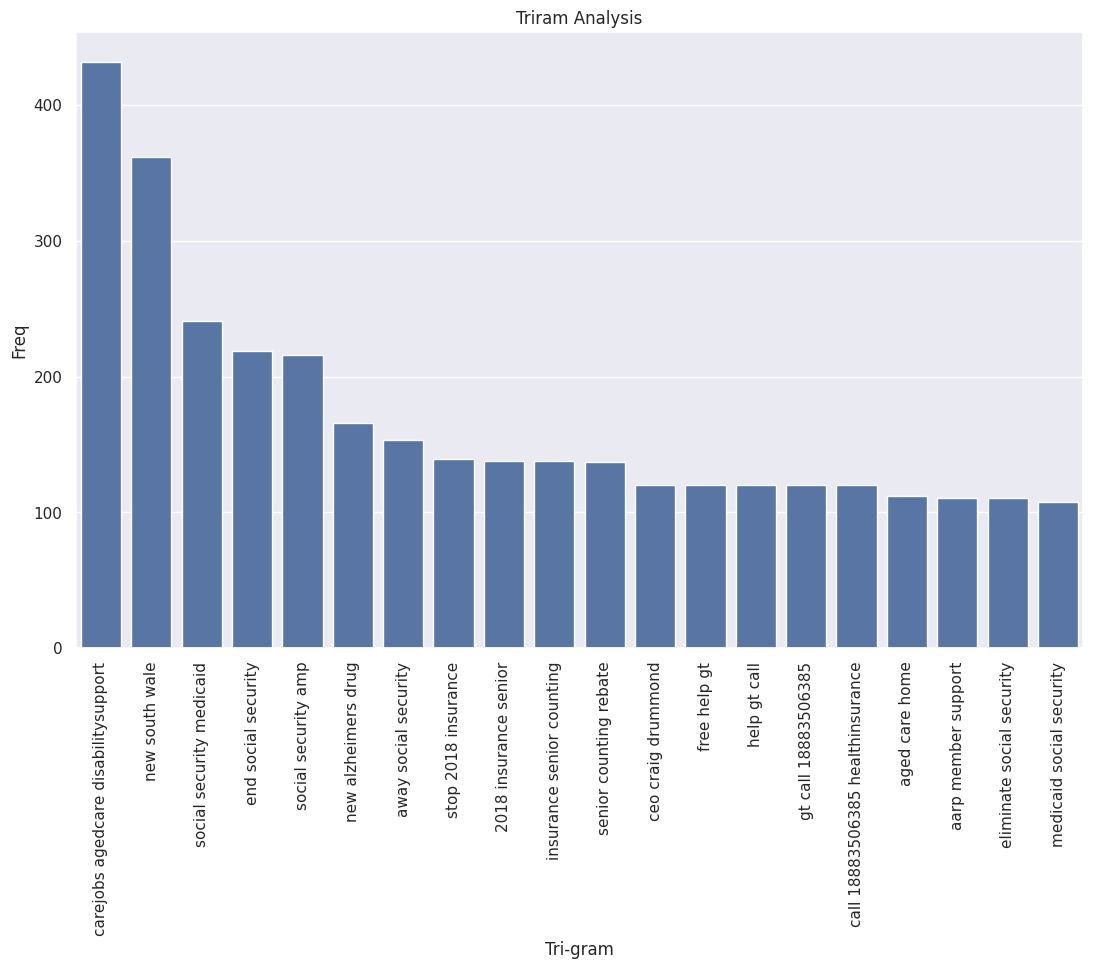

In [ ]:
df_bi = get_ngrams(new_df['content_lem'].tolist(), ngram_range=(3, 3))
df_bi = pd.DataFrame(df_bi)
df_bi.columns=["Tri-gram", "Freq"]

# Barplot of most freq Bi-grams
top_bigrams_to_show = 20

sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Tri-gram", y="Freq", data=df_bi[:top_bigrams_to_show])
h.set_xticklabels(h.get_xticklabels(), rotation=90)  # here rotation parameter shows the angle of your x-axis labels
plt.title('Triram Analysis')
plt.show()



#Temporal Analysis

In [ ]:
import pandas as pd

# Assuming new_df is your DataFrame with 'date' column

# Convert 'date' column to datetime format with errors='coerce'
new_df['date'] = pd.to_datetime(new_df['date'], errors='coerce')

# Filter rows with non-matching date formats
non_matching_rows = new_df[new_df['date'].isna()]

# Filter out rows with non-matching date formats from the original DataFrame
new_df = new_df[new_df['date'].notna()]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61851 entries, 12665 to 78586
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         61851 non-null  datetime64[ns]
 1   tweet        61851 non-null  object        
 2   provider     61851 non-null  object        
 3   content_lem  61851 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 2.4+ MB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
new_df_daten_wise = new_df.groupby(new_df['date'])['tweet'].count().reset_index(name='tweet_count_comp')
new_df_daten_provider_wise = new_df.groupby(['date', 'provider'])['tweet'].count().reset_index(name='tweet_count_comp')

new_df_month_wise = new_df.groupby(new_df['date'].dt.month)['tweet'].count().reset_index(name='tweet_count_comp')
new_df_month_provider_wise = (new_df.groupby([new_df['date'].dt.month, 'provider'])['tweet'].count().reset_index(name='tweet_count_comp'))

new_df_year_wise = new_df.groupby(new_df['date'].dt.year)['tweet'].count().reset_index(name='tweet_count_comp')
new_df_year_provider_wise = (new_df.groupby([new_df['date'].dt.year, 'provider'])['tweet'].count().reset_index(name='tweet_count_comp'))


new_df_date_wise = new_df.groupby(new_df['date'].dt.day_name())['tweet'].count().reset_index(name='tweet_count_comp')
new_df_date_provider_wise = (new_df.groupby([new_df['date'].dt.day_name(), 'provider'])['tweet'].count().reset_index(name='tweet_count_comp'))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##Temporal Analysis by date

In [ ]:
new_df_daten_wise.sort_values(by="tweet_count_comp",ascending =False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


date  tweet_count_comp
2155 2022-04-06              4525
2154 2022-04-05              4016
2156 2022-04-07              3354
2159 2022-04-10              3006
2157 2022-04-08              2852
...         ...               ...
165  2016-07-28                 1
167  2016-07-30                 1
173  2016-08-06                 1
178  2016-08-14                 1
2169 2022-04-23                 1

[2170 rows x 2 columns]

In [ ]:
new_df.loc[new_df['date'] == '2022-04-06']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


date                                              tweet  provider  \
12694 2022-04-06                          get bupa try medibank ahm  medibank   
12695 2022-04-06  far far far prefer australias conjunctions lik...  medibank   
12696 2022-04-06                        best wishes business growth  medibank   
12698 2022-04-06  hi thank message sorry long wait please dm ass...  medibank   
12699 2022-04-06  hi end policy medibank app chat slow links ema...  medibank   
...          ...                                                ...       ...   
43    2022-04-06  appreciate quick response shame customers reac...      bupa   
44    2022-04-06  operator facility form bupa never learns toned...      bupa   
45    2022-04-06                               done sent details dm      bupa   
46    2022-04-06  sausage travel look linkedin page sausage phot...      bupa   
75776 2022-04-06                                       nft nfts eth       hbf   

                                             content_lem  sentiment  
12694                                   get bupa try ahm   0.000000  
12695  far far far prefer australia conjunction like ...   0.100000  
12696                          best wish business growth   1.000000  
12698  thank message sorry long wait please assistanc...   0.016667  
12699  end policy app chat slow link email address an...  -0.300000  
...                                                  ...        ...  
43     appreciate quick response shame customer reach...   0.100000  
44     operator facility form never learns tonedeaf p...  -0.400000  
45                                   done sent detail dm   0.000000  
46       sausage travel look linkedin page sausage photo   0.000000  
75776                                       nft nfts eth   0.000000  

[4525 rows x 5 columns]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
max_indices = new_df_daten_provider_wise.groupby('provider')['tweet_count_comp'].idxmax()
new_df_daten_provider_wise.loc[max_indices, ['provider', 'date', 'tweet_count_comp']]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


provider       date  tweet_count_comp
2468      bupa 2018-12-15               455
6076       hbf 2022-01-30                29
1239  medibank 2017-11-13               167
6318  medicare 2022-04-06              4488

##Temporal Analysis by Month


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


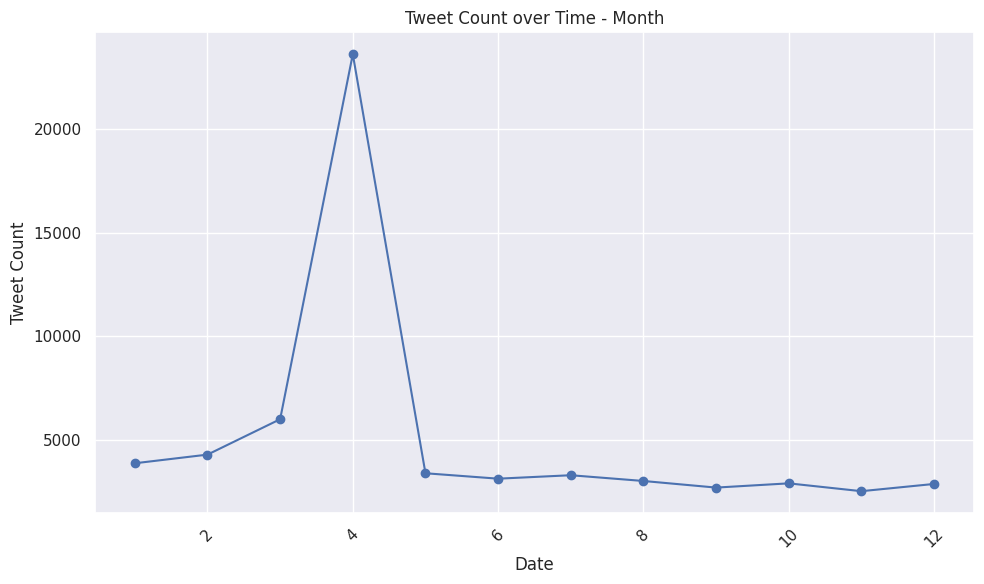

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(new_df_month_wise['date'], new_df_month_wise['tweet_count_comp'], marker='o', linestyle='-', color='b')

plt.title('Tweet Count over Time - Month')
plt.xlabel('Date')
plt.ylabel('Tweet Count')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


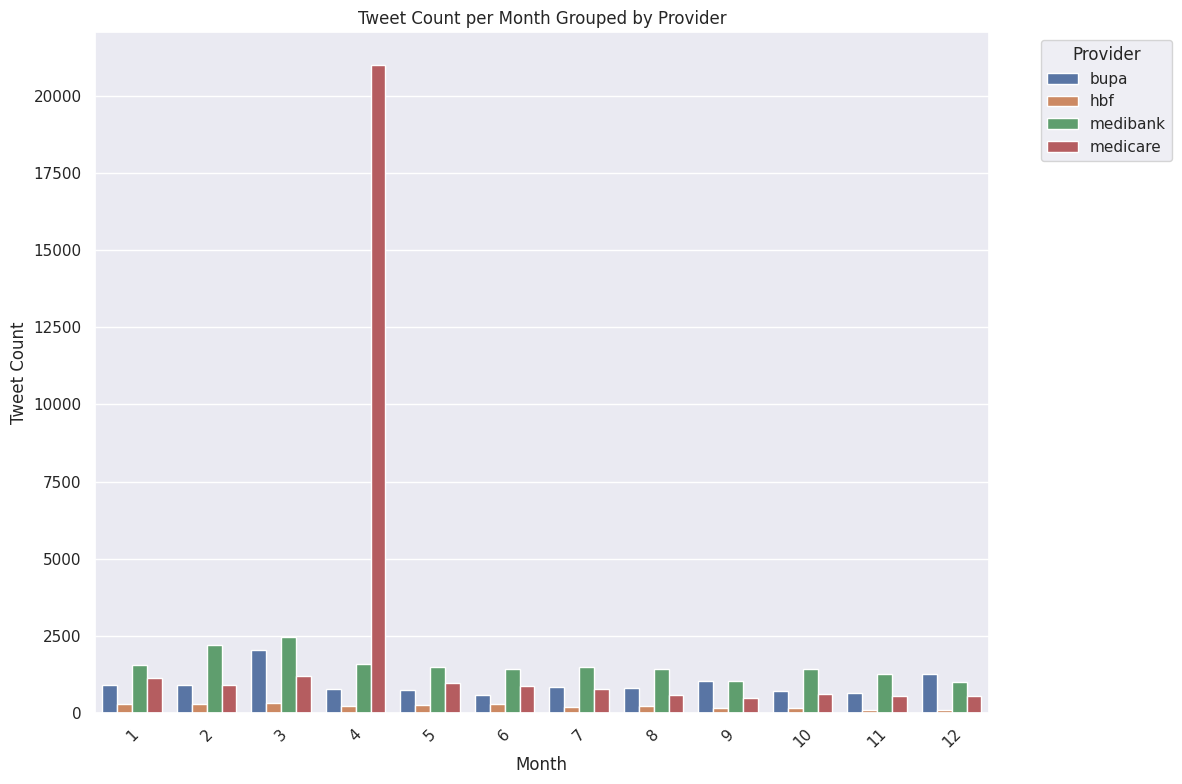

In [ ]:
#Provider wise

plt.figure(figsize=(12, 8))
sns.barplot(x='date', y='tweet_count_comp', hue='provider', data=new_df_month_provider_wise)

plt.title('Tweet Count per Month Grouped by Provider')
plt.xlabel('Month')
plt.ylabel('Tweet Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Provider', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

##Temporal Analysis by Year




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


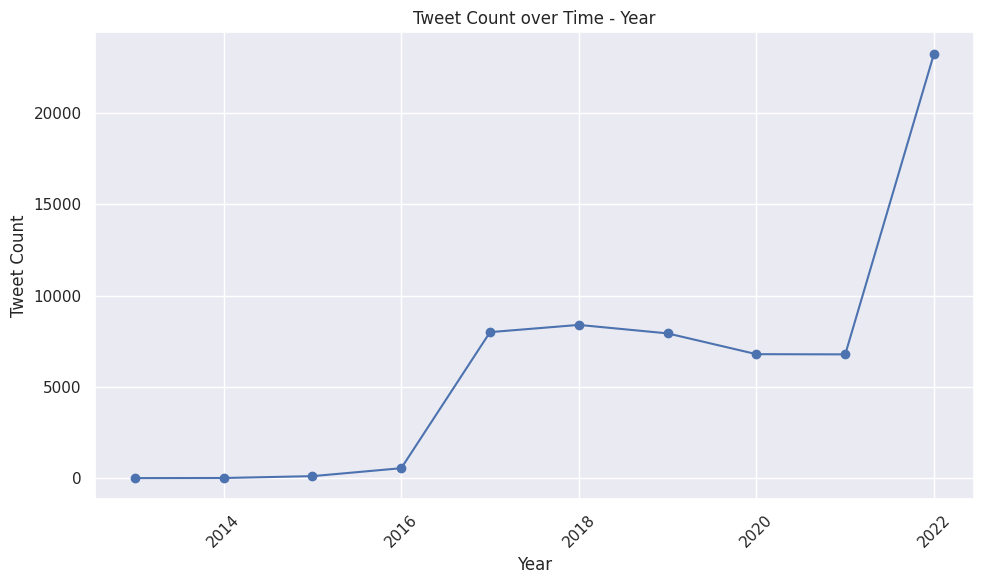

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(new_df_year_wise['date'], new_df_year_wise['tweet_count_comp'], marker='o', linestyle='-', color='b')

plt.title('Tweet Count over Time - Year')
plt.xlabel('Year')
plt.ylabel('Tweet Count')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


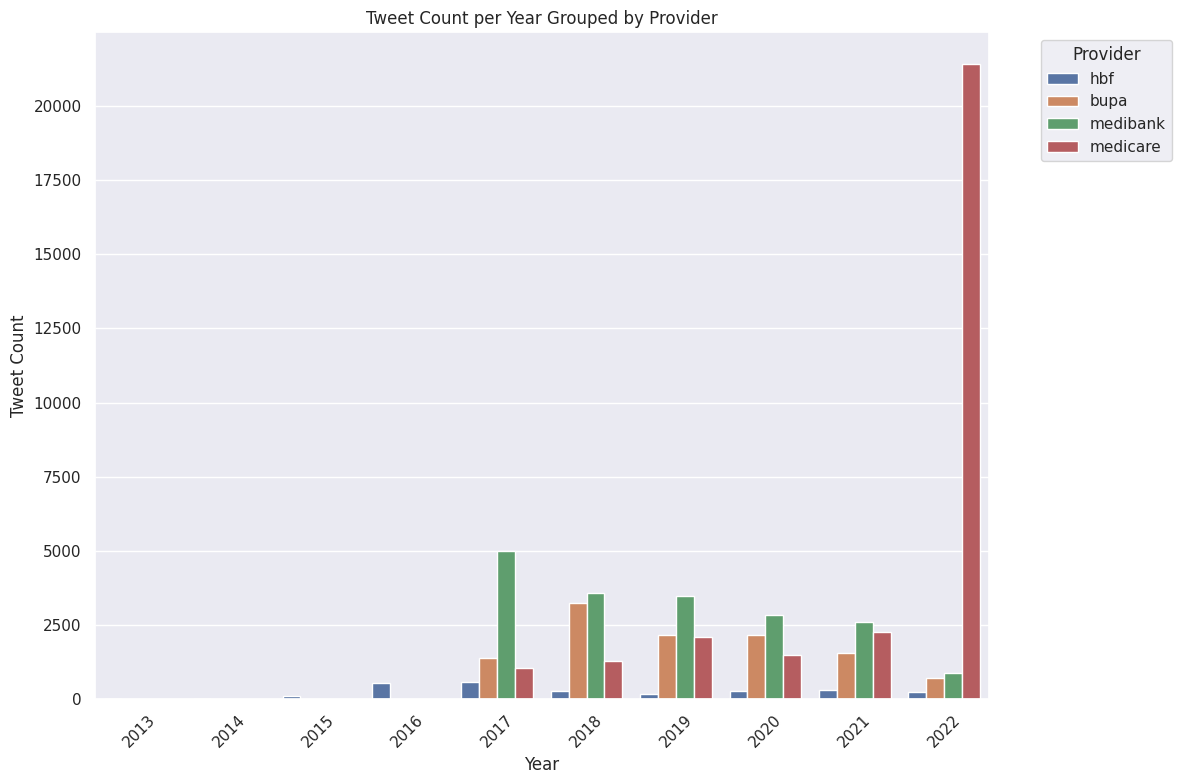

In [ ]:
#Provider wise

plt.figure(figsize=(12, 8))
sns.barplot(x='date', y='tweet_count_comp', hue='provider', data=new_df_year_provider_wise)

plt.title('Tweet Count per Year Grouped by Provider')
plt.xlabel('Year')
plt.ylabel('Tweet Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Provider', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

##Temporal Analysis by Day

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


        date  tweet_count_comp
0     Monday              6987
1    Tuesday             11601
2  Wednesday             11341
3   Thursday             10227
4     Friday              8501
5   Saturday              6049
6     Sunday              7145


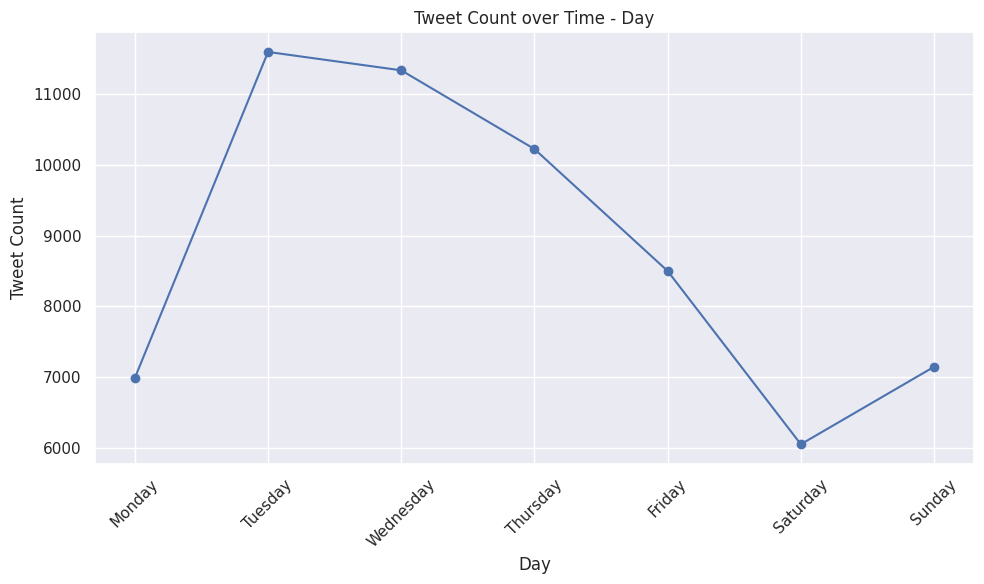

In [ ]:
data = {
    'date': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    'tweet_count_comp': [6987, 11601, 11341, 10227, 8501, 6049, 7145]
}

# Create a DataFrame from the data dictionary with specified column names and index
daywise = pd.DataFrame(data)

# Display the DataFrame
print(daywise)


plt.figure(figsize=(10, 6))
plt.plot(daywise['date'], daywise['tweet_count_comp'], marker='o', linestyle='-', color='b')

plt.title('Tweet Count over Time - Day')
plt.xlabel('Day')
plt.ylabel('Tweet Count')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


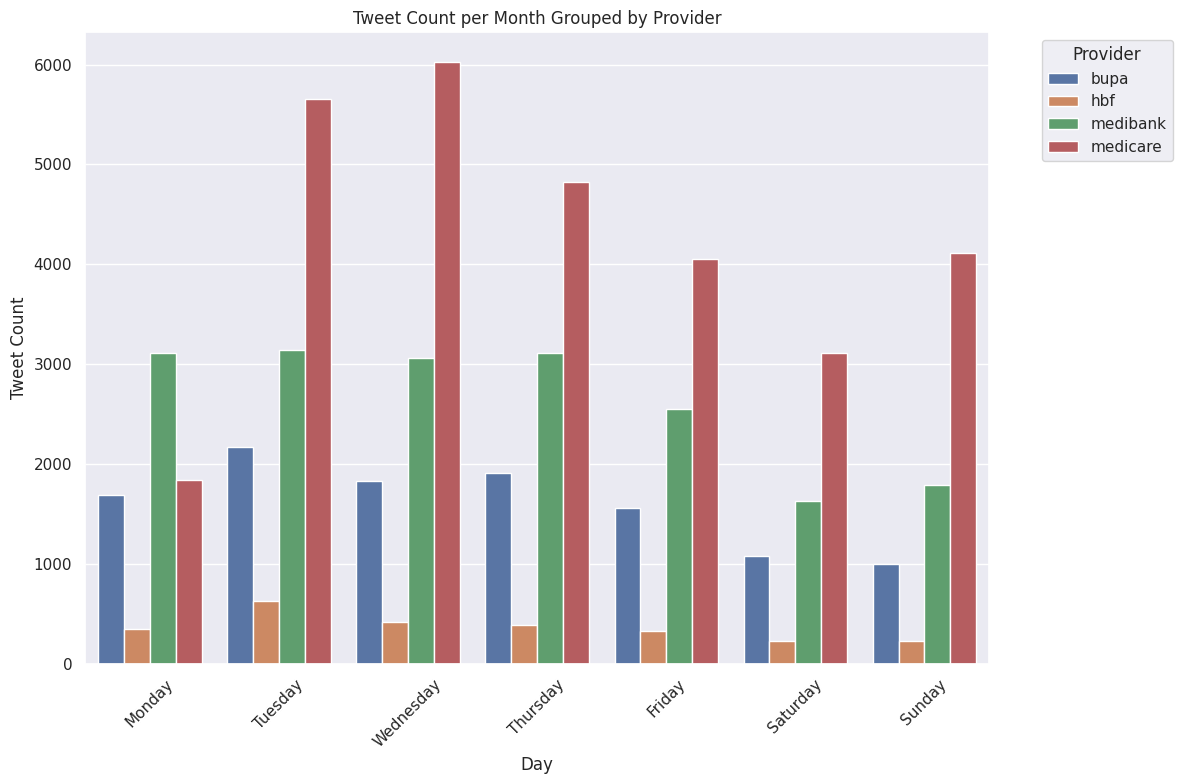

In [ ]:
#Provider wise
weekdays_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

new_df_date_provider_wise['date'] = pd.Categorical(new_df_date_provider_wise['date'], categories=weekdays_order, ordered=True)
new_df_date_provider_wise = new_df_date_provider_wise.sort_values('date')



plt.figure(figsize=(12, 8))
sns.barplot(x='date', y='tweet_count_comp', hue='provider', data=new_df_date_provider_wise
)

plt.title('Tweet Count per Month Grouped by Provider')
plt.xlabel('Day')
plt.ylabel('Tweet Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Provider', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

# Sentiment Analysis

In [ ]:
from textblob import TextBlob

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Extract sentiments from the tweets (This should take some time because we run this to the entire dataset.)
new_df['sentiment'] = new_df['content_lem'].apply(lambda x: TextBlob(x).sentiment.polarity)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-443-209d95ad5202>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['sentiment'] = new_df['content_lem'].apply(lambda x: TextBlob(x).sentiment.polarity)


In [ ]:
new_df[['tweet', 'sentiment']].head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


tweet  sentiment
12665  fraser government destroyed original medibank ...   0.125000
12666  actually whitlam made medibank fraser done wor...  -0.500000
12667  316 fair greens labor problem dental medicare ...   0.218750
12668  actually greg labor invented pbs 70 years ago ...  -0.033333
12669  85 dont education medibank medicare nbn slow e...  -0.400000
12670                            medibank waiting period   0.000000
12671  316 frankly amazing quickly entire sector lube...   0.300000
12672  slow metabolism cause weight gain medibank eas...  -0.300000
12673  free university tafe medibank opposed vietnam ...   0.216667
12674  labor always party focused health insiders bou...   0.000000

In [ ]:
average_sentiment = new_df['sentiment'].mean()

print(f"Average Sentiment: {average_sentiment:.2f}")

Average Sentiment: 0.07


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


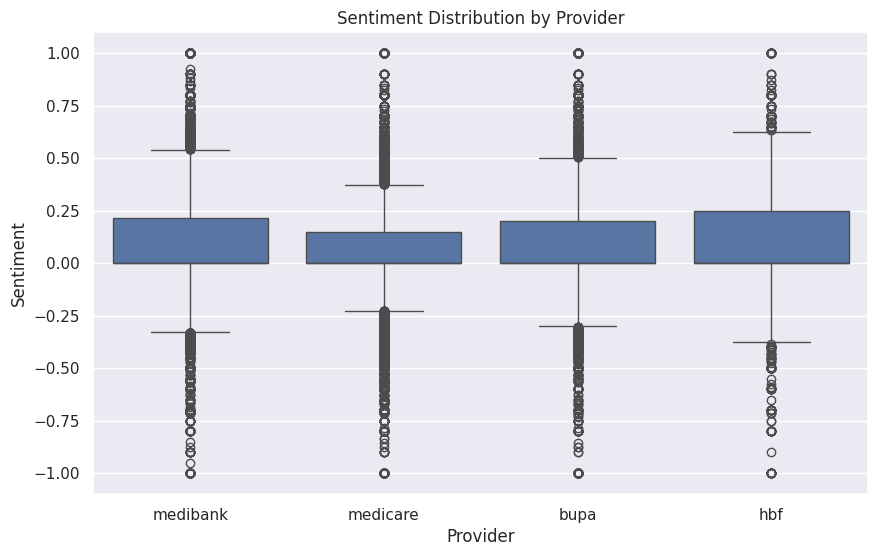

In [ ]:
# Plotting box plots using Seaborn with custom color palette
plt.figure(figsize=(10, 6))
sns.boxplot(x='provider', y='sentiment', data=new_df)
plt.title('Sentiment Distribution by Provider')
plt.xlabel('Provider')
plt.ylabel('Sentiment')
plt.show()

In [ ]:
mean_sentiment_by_provider = new_df.groupby(['provider'])['sentiment'].mean()
mean_sentiment_by_provider

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


provider
bupa        0.081346
hbf         0.104382
medibank    0.090735
medicare    0.051276
Name: sentiment, dtype: float64

In [ ]:
mean_sentiment_by_date = new_df.groupby(['date'])['sentiment'].mean()
mean_sentiment_by_date
mean_sentiment_by_date_sorted = mean_sentiment_by_date.sort_values(ascending=False)
mean_sentiment_by_date_sorted

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


date
2016-03-01    1.000000
2016-07-27    0.900000
2016-12-12    0.800000
2016-07-07    0.800000
2016-07-16    0.800000
                ...   
2020-01-11   -0.321970
2016-05-23   -0.333333
2016-06-13   -0.400000
2016-01-11   -0.500000
2018-12-25   -0.800000
Name: sentiment, Length: 2170, dtype: float64

In [ ]:
mean_sentiment_year = new_df.groupby(new_df['date'].dt.year)['sentiment'].mean().reset_index(name='mean_sentiment')
mean_sentiment_year

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


date  mean_sentiment
0  2013        0.375000
1  2014        0.200000
2  2015        0.200592
3  2016        0.140808
4  2017        0.087799
5  2018        0.079047
6  2019        0.076246
7  2020        0.083290
8  2021        0.070306
9  2022        0.054015

In [ ]:
# Group by year and provider, calculate mean sentiment
mean_sentiment = new_df.groupby([new_df['date'].dt.year, 'provider'])['sentiment'].mean().reset_index(name='mean_sentiment')

# Display the DataFrame with mean sentiment grouped by year and provider
print(mean_sentiment)

    date  provider  mean_sentiment
0   2013       hbf        0.375000
1   2014       hbf        0.200000
2   2015       hbf        0.200592
3   2016       hbf        0.140808
4   2017      bupa        0.099158
5   2017       hbf        0.101779
6   2017  medibank        0.091875
7   2017  medicare        0.045553
8   2018      bupa        0.064634
9   2018       hbf        0.131663
10  2018  medibank        0.099767
11  2018  medicare        0.046065
12  2019      bupa        0.062914
13  2019       hbf        0.113232
14  2019  medibank        0.097994
15  2019  medicare        0.050938
16  2020      bupa        0.107519
17  2020       hbf        0.080986
18  2020  medibank        0.085882
19  2020  medicare        0.043602
20  2021      bupa        0.098044
21  2021       hbf        0.060455
22  2021  medibank        0.080778
23  2021  medicare        0.040559
24  2022      bupa        0.062726
25  2022       hbf        0.030662
26  2022  medibank        0.064210
27  2022  medicare  

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


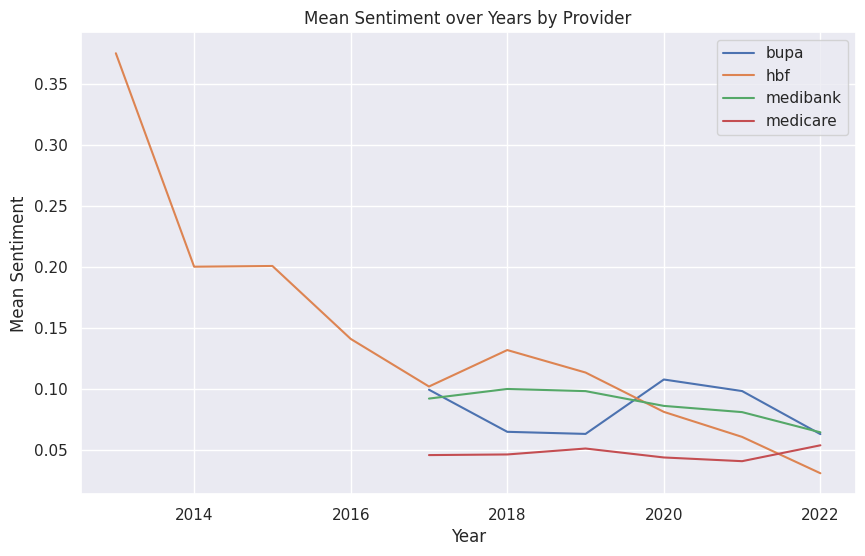

In [ ]:
# Group by year and provider, calculate mean sentiment
mean_sentiment = new_df.groupby([new_df['date'].dt.year, 'provider'])['sentiment'].mean().reset_index(name='mean_sentiment')

# Pivot the DataFrame to have providers as columns
pivot_df = mean_sentiment.pivot(index='date', columns='provider', values='mean_sentiment')

# Plotting a line chart grouped by provider
plt.figure(figsize=(10, 6))
for column in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[column], label=column)

plt.title('Mean Sentiment over Years by Provider')
plt.xlabel('Year')
plt.ylabel('Mean Sentiment')
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


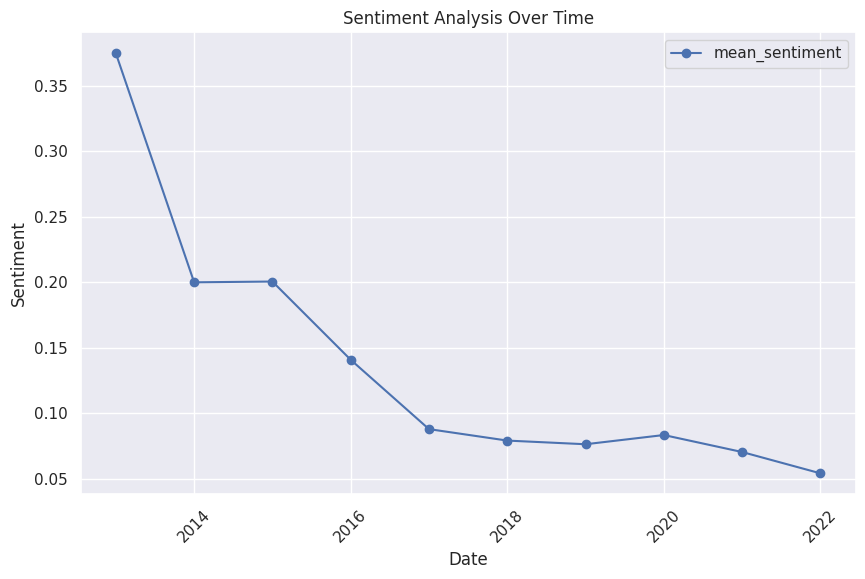

In [ ]:
# Plot line chart of sentiment as a function of date
plt.figure(figsize=(10, 6))  # Set the figure size (width, height)
plt.plot(mean_sentiment_year['date'], mean_sentiment_year['mean_sentiment'], marker='o', linestyle='-', color='b', label='mean_sentiment')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Sentiment')
plt.title('Sentiment Analysis Over Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)  # Add gridlines to the plot
plt.legend()  # Display legend with labels

# Show plot
plt.show()

# Topic Modeling

In [ ]:
TEMP_FOLDER = tempfile.gettempdir()
print('Folder "{}" will be used to save temporary dictionary and corpus.'.format(TEMP_FOLDER))
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

Folder "/tmp" will be used to save temporary dictionary and corpus.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Convert the tweets as the text corpus.
corpus = list(new_df['content_lem'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
corpus[:5]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['fraser government destroyed original liberal philosophically opposed universal heathcare system cannot trusted maintaining',
 'actually whitlam made fraser done worst resurrected hawke',
 '316 fair green labor problem dental always refusal dentist participate dental part original plan dentist simply refused part nothing changed libs dont care course',
 'actually greg labor invented pb 70 year ago pm curtin gough whitlams labor govt invented libs closed labor reinvented hawke amp hero howard declared amp libs sworn enemy universal care',
 '85 dont education nbn slow expensive obsolete kevin']

In [ ]:
hbf_texts = [[word for word in str(document).split()] for document in corpus]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
hbf_texts[:5]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['fraser',
  'government',
  'destroyed',
  'original',
  'liberal',
  'philosophically',
  'opposed',
  'universal',
  'heathcare',
  'system',
  'cannot',
  'trusted',
  'maintaining'],
 ['actually',
  'whitlam',
  'made',
  'fraser',
  'done',
  'worst',
  'resurrected',
  'hawke'],
 ['316',
  'fair',
  'green',
  'labor',
  'problem',
  'dental',
  'always',
  'refusal',
  'dentist',
  'participate',
  'dental',
  'part',
  'original',
  'plan',
  'dentist',
  'simply',
  'refused',
  'part',
  'nothing',
  'changed',
  'libs',
  'dont',
  'care',
  'course'],
 ['actually',
  'greg',
  'labor',
  'invented',
  'pb',
  '70',
  'year',
  'ago',
  'pm',
  'curtin',
  'gough',
  'whitlams',
  'labor',
  'govt',
  'invented',
  'libs',
  'closed',
  'labor',
  'reinvented',
  'hawke',
  'amp',
  'hero',
  'howard',
  'declared',
  'amp',
  'libs',
  'sworn',
  'enemy',
  'universal',
  'care'],
 ['85', 'dont', 'education', 'nbn', 'slow', 'expensive', 'obsolete', 'kevin']]

In [ ]:
# Create a dictionary based on the tokanized words of all the tweets.
dictionary = corpora.Dictionary(hbf_texts)

# Save the above dictionary as a local file for LDA model to access.
dictionary.save(os.path.join(TEMP_FOLDER, 'hbf.dict'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(hbf_texts[0])
print('alphabetically sorted', sorted(hbf_texts[0]))

['fraser', 'government', 'destroyed', 'original', 'liberal', 'philosophically', 'opposed', 'universal', 'heathcare', 'system', 'cannot', 'trusted', 'maintaining']
alphabetically sorted ['cannot', 'destroyed', 'fraser', 'government', 'heathcare', 'liberal', 'maintaining', 'opposed', 'original', 'philosophically', 'system', 'trusted', 'universal']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(hbf_texts[1])
print('alphabetically sorted', sorted(hbf_texts[1]))

['actually', 'whitlam', 'made', 'fraser', 'done', 'worst', 'resurrected', 'hawke']
alphabetically sorted ['actually', 'done', 'fraser', 'hawke', 'made', 'resurrected', 'whitlam', 'worst']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Print the dictionary
print(dictionary.token2id)

{'cannot': 0, 'destroyed': 1, 'fraser': 2, 'government': 3, 'heathcare': 4, 'liberal': 5, 'maintaining': 6, 'opposed': 7, 'original': 8, 'philosophically': 9, 'system': 10, 'trusted': 11, 'universal': 12, 'actually': 13, 'done': 14, 'hawke': 15, 'made': 16, 'resurrected': 17, 'whitlam': 18, 'worst': 19, '316': 20, 'always': 21, 'care': 22, 'changed': 23, 'course': 24, 'dental': 25, 'dentist': 26, 'dont': 27, 'fair': 28, 'green': 29, 'labor': 30, 'libs': 31, 'nothing': 32, 'part': 33, 'participate': 34, 'plan': 35, 'problem': 36, 'refusal': 37, 'refused': 38, 'simply': 39, '70': 40, 'ago': 41, 'amp': 42, 'closed': 43, 'curtin': 44, 'declared': 45, 'enemy': 46, 'gough': 47, 'govt': 48, 'greg': 49, 'hero': 50, 'howard': 51, 'invented': 52, 'pb': 53, 'pm': 54, 'reinvented': 55, 'sworn': 56, 'whitlams': 57, 'year': 58, '85': 59, 'education': 60, 'expensive': 61, 'kevin': 62, 'nbn': 63, 'obsolete': 64, 'slow': 65, 'period': 66, 'waiting': 67, 'amazing': 68, 'bent': 69, 'demon': 70, 'eating':

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Convert the text dictionary to bag of words model
corpus = [dictionary.doc2bow(text) for text in hbf_texts]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
tweet_id = 0
print(hbf_texts[tweet_id]) # each tweet converted to tokens
print(dictionary.doc2bow(hbf_texts[tweet_id])) # each token is represented as a id from a dictionary

['fraser', 'government', 'destroyed', 'original', 'liberal', 'philosophically', 'opposed', 'universal', 'heathcare', 'system', 'cannot', 'trusted', 'maintaining']
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##Generating the topic model

In [ ]:
# Construct TF-IDF features from the dictionary.
tfidf = models.TfidfModel(corpus)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Transform the tweets as TF-IDF feature vectors
corpus_tfidf = tfidf[corpus]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
total_topics = 10

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
lda = models.LdaModel(corpus, id2word=dictionary, num_topics=total_topics)
corpus_lda = lda[corpus_tfidf] # create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Print the Keyword in the 10 topics
lda.show_topics(total_topics, num_words=6)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.015*"food" + 0.011*"not" + 0.009*"stop" + 0.009*"awesome" + 0.008*"amp" + 0.008*"action"'),
 (1,
  '0.020*"injury" + 0.015*"award" + 0.014*"guy" + 0.013*"ad" + 0.013*"ceo" + 0.011*"game"'),
 (2,
  '0.014*"south" + 0.012*"get" + 0.011*"make" + 0.010*"dont" + 0.010*"free" + 0.009*"want"'),
 (3,
  '0.030*"new" + 0.016*"great" + 0.015*"amp" + 0.013*"home" + 0.011*"aged" + 0.010*"research"'),
 (4,
  '0.029*"social" + 0.027*"security" + 0.017*"amp" + 0.015*"year" + 0.011*"4" + 0.010*"assistant"'),
 (5,
  '0.018*"amp" + 0.017*"republican" + 0.012*"want" + 0.011*"auspol" + 0.010*"u" + 0.010*"cut"'),
 (6,
  '0.015*"amp" + 0.015*"medicaid" + 0.012*"drug" + 0.010*"american" + 0.010*"care" + 0.008*"program"'),
 (7,
  '0.035*"thanks" + 0.016*"please" + 0.016*"customer" + 0.014*"resident" + 0.013*"im" + 0.011*"thank"'),
 (8,
  '0.023*"not" + 0.019*"care" + 0.014*"cover" + 0.013*"insurance" + 0.011*"private" + 0.010*"need"'),
 (9,
  '0.011*"hold" + 0.010*"call" + 0.010*"week" + 0.008*"day" 

## Interactive topic analyzer

In [ ]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.gensim_models.prepare(lda, corpus_lda, dictionary, mds='tsne')
panel

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
5     -42.324566  38.965912       1        1  51.173526
1      54.108391  65.091866       2        1   6.387503
0      69.838692  14.646105       3        1   5.763832
2     -39.839954 -17.226238       4        1   5.252841
6      26.222887  33.799072       5        1   5.237891
7      -9.078005  12.289091       6        1   5.237320
8      -2.041661  67.337860       7        1   5.237185
3      27.161318  -7.423465       8        1   5.236641
4      57.456379 -36.384670       9        1   5.236634
9       1.857878 -43.179485      10        1   5.236627, topic_info=             Term        Freq       Total Category  logprob  loglift
22           care  451.000000  451.000000  Default  30.0000  30.0000
15565  republican  545.000000  545.000000  Default  29.0000  29.0000
42            amp  821.000000  821.000000  Default  28.0000  28.0000
425        thanks  138.000000  138.000000  Default  27.0000  27.0000
369           not  437.000000  437.000000  Default  26.0000  26.0000
...           ...         ...         ...      ...      ...      ...
79            one   17.910559  147.948654  Topic10  -5.1976   0.8380
58           year   17.074946  119.697058  Topic10  -5.2454   1.0021
1460       profit   15.427002  129.312102  Topic10  -5.3469   0.8234
23575   insurance   14.641433  111.636013  Topic10  -5.3991   0.9181
1227            2   13.644133   96.292458  Topic10  -5.4697   0.9954

[654 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
1394      1  0.681348      1
1394      3  0.024627      1
1394      4  0.016418      1
1394      6  0.041045      1
1394      7  0.049254      1
...     ...       ...    ...
862       3  0.492992  youre
862       5  0.061624  youre
862       6  0.123248  youre
862       7  0.164331  youre
3476      7  0.924614     yr

[1350 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 2, 1, 3, 7, 8, 9, 4, 5, 10])

In [ ]:

# Filter rows where the specified column contains 'amp'
filteredn_df = new_df[new_df['tweet'].str.contains('amp', case=False)]

# Display the filtered DataFrame
filteredn_df


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


date                                              tweet  provider  \
12668 2022-04-10  actually greg labor invented pbs 70 years ago ...  medibank   
12673 2022-04-10  free university tafe medibank opposed vietnam ...  medibank   
12681 2022-04-08  dinkum007 shame isnt shouldnt really need say ...  medibank   
12682 2022-04-08  lnp hated medicareforall like vampires hate ga...  medibank   
12683 2022-04-08  lnp hated medicareforall like vampires hate ga...  medibank   
...          ...                                                ...       ...   
78512 2015-09-27       perthmarketing update stories via amp agency       hbf   
78531 2015-09-16  get latest priddis amp masten medical update g...       hbf   
78537 2015-09-08  get latest masten schofield amp lycett medical...       hbf   
78540 2015-09-07       passion courage amp luck win premiership cup       hbf   
78567 2015-09-06       05 touch confusing leave tweet amp well find       hbf   

                                             content_lem  sentiment  
12668  actually greg labor invented pb 70 year ago pm...  -0.033333  
12673  free university tafe opposed vietnam war polic...   0.216667  
12681  dinkum007 shame isnt shouldnt really need say ...   0.225000  
12682  lnp hated medicareforall like vampire hate gar...  -0.566667  
12683  lnp hated medicareforall like vampire hate gar...  -0.566667  
...                                                  ...        ...  
78512         perthmarketing update story via amp agency   0.000000  
78531  get latest priddis amp masten medical update g...   0.250000  
78537  get latest masten schofield amp lycett medical...   0.250000  
78540       passion courage amp luck win premiership cup   0.800000  
78567       05 touch confusing leave tweet amp well find  -0.300000  

[6439 rows x 5 columns]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
